<strong>Goal: </strong>
<br>Estimate the return from a direct mailing in order to maximize donation profits.
<br>Subject: Lapsing donors
<br><strong>Models needed:</strong>
<br>- Classifier: Identify which donors are most susceptible to donating (to send or not to send mail)
<br>- Predict donation value: How much will be donated by a specific person/group (how much to invest in sending the mail)

<h3>Preparing the dataset</h3>

In [1]:
import pandas as pd

In [2]:
#since i cannot run the entire thing via pandas because of memory error, im cutting the dataset into chunks before exploring
dffeat_chunk = pd.read_csv('cup98LRN.txt', sep=",", chunksize=1000) #feature+target vars
dftarget_chunk = pd.read_csv('valtargt.txt',sep=',', chunksize=1000) #target only vars

In [3]:
#it results to a TextFileReader object (iterable), not a df
type(dffeat_chunk)

pandas.io.parsers.TextFileReader

In [4]:
#i now need to iterate each item to make a list so i can explore and manipulate the contents
dffeat_chunk_list = [chunk for chunk in dffeat_chunk]
dftarget_chunk_list = [chunk for chunk in dftarget_chunk]

In [5]:
#just to check that the shapes of both datasets match
print(len(dffeat_chunk_list))
print(len(dftarget_chunk_list))

96
97


In [6]:
#features dataset has been split into 96 chunks of ~1000 observations/rows each
#target dataset has been split into 97 chunks of ~1000 observations/rows each
#lengths dont match; do not merge yet
#clean up features set temporarily; check length of CONTROLN for both sets, then check unique elements to see discrepancies

In [7]:
temp_dffeat_chunk_list = []
for i in range(len(dffeat_chunk_list)):
    dffeat_chunk_df = pd.DataFrame(dffeat_chunk_list[i])
    dffeat_chunk_df = dffeat_chunk_df[['ODATEDW','CONTROLN']]
    temp_dffeat_chunk_list.append(dffeat_chunk_df)

temp_dffeat_chunk_concat = pd.concat(temp_dffeat_chunk_list)
temp_dffeat_chunk_concat.tail()

,ODATEDW,CONTROLN
95407,9601,184568
95408,9601,122706
95409,9501,189641
95410,8601,4693
95411,8801,185114


In [8]:
temp_dffeat_chunk_concat['CONTROLN'].nunique()

95412

In [9]:
temp_dftarget_nochunk = pd.read_csv('valtargt.txt',sep=',')
temp_dftarget_nochunk['CONTROLN'].nunique()

96367

In [10]:
#there are more unique values under the target dataset vs features dataset
#no need to merge as Target variables are also present in the Features set
#assume that extra CONTROLNs under Target set do not have corresponding info in the Features set

In [11]:
#for real this time
#filter features that will be helpful in determining if the donor has money or willingness to give money
#will also exclude redundant columns
#based on col desc on: https://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt

fin_dffeat_chunk_list = []
for i in range(len(dffeat_chunk_list)):
    fin_dffeat_chunk_df = pd.DataFrame(dffeat_chunk_list[i])
    fin_dffeat_chunk_df = fin_dffeat_chunk_df[['ODATEDW','RECINHSE','RECP3','RECPGVG','MDMAUD','DOMAIN','CLUSTER','AGE',
                                       'HOMEOWNR','NUMCHLD','INCOME','GENDER','WEALTH1','HIT','SOLP3','SOLIH',
                                       'MAJOR','WEALTH2','HV1','HV2','HV3','HV4','IC1','IC2','IC3','IC4','IC5',
                                       'RFA_2','RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','LASTDATE','TIMELAG',
                                       'AVGGIFT','CONTROLN','TARGET_B','TARGET_D']]
    fin_dffeat_chunk_list.append(fin_dffeat_chunk_df)

fin_dffeat_chunk_concat = pd.concat(fin_dffeat_chunk_list)
fin_dffeat_chunk_concat.tail()

,ODATEDW,RECINHSE,RECP3,RECPGVG,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,NUMCHLD,...,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D
95407,9601,,,,XXXX,C2,27,NaN,,NaN,...,25.0,1,0,25.0,9602,NaN,25.000000,184568,0,0.0
95408,9601,,,,XXXX,C1,24,48.0,H,1.0,...,20.0,1,0,20.0,9603,NaN,20.000000,122706,0,0.0
95409,9501,,X,,XXXX,C3,30,60.0,,NaN,...,58.0,7,4,10.0,9610,3.0,8.285714,189641,0,0.0
95410,8601,X,,,XXXX,C1,24,58.0,H,NaN,...,498.0,41,18,18.0,9701,4.0,12.146341,4693,1,18.0
95411,8801,X,,X,C1CM,C1,24,80.0,U,NaN,...,3775.0,39,11,100.0,9612,6.0,96.794872,185114,0,0.0


In [12]:
## ---- TEST CODE ---- ##

#just checking a single row:

## print(dffeat_chunk_list[0].iloc[0])
## print(dftarget_chunk_list[0].iloc[0])

In [13]:
#still cant convert all into a single df because memory so im going to clean up per chunk to limit size 

In [14]:
## ---- TEST CODE ---- ##

# dffeat_chunk_list_0 = pd.DataFrame(dffeat_chunk_list[0])
# dftarget_chunk_list_0 = pd.DataFrame(dftarget_chunk_list[0])
# dftarget_chunk_list_96['CONTROLN'].nunique()

In [15]:
#just so i dont deal with an extra long var name
df = fin_dffeat_chunk_concat

In [16]:
df.columns

Index(['ODATEDW', 'RECINHSE', 'RECP3', 'RECPGVG', 'MDMAUD', 'DOMAIN',
       'CLUSTER', 'AGE', 'HOMEOWNR', 'NUMCHLD', 'INCOME', 'GENDER', 'WEALTH1',
       'HIT', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'HV1', 'HV2', 'HV3', 'HV4',
       'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'RFA_2', 'RAMNTALL', 'NGIFTALL',
       'CARDGIFT', 'LASTGIFT', 'LASTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN',
       'TARGET_B', 'TARGET_D'],
      dtype='object')

In [17]:
#renaming some columns for clarity
df.rename(columns={'ODATEDW':'First Gift (YYMM)','RECINHSE':'Donated to In House','RECP3':'Donated to P3',
                  'RECPGVG':'Has Planned Giving Record','MDMAUD':'RFA Matrix','DOMAIN':'Neighbhd/Socio-ec Status',
                   'HIT':'No. of Mail Order Responses','SOLP3':'P3 Solicitation Limit',
                   'SOLIH':'In House Solicitation Limit','MAJOR':'Is a major donor','WEALTH2':'Approximation of Wealth',
                  'HV1':'Median HomeVal (hundreds)','HV2':'Avg HomeVal (hundreds)','HV3':'Median Rent(hundreds)',
                  'HV4':'Avg Rent(hundreds)','IC1':'Median Hshold Incm (hundreds)','IC2':'Median Family Incm (hundreds)',
                  'IC3':'Avg Hshold Incm (hundreds)','IC4':'Avg Family Incm (hundreds)','IC5':'Per Capita Income',
                  'RFA_2':'RFA Status as of 97NK','RAMNTALL':'Total Amt (All Gifts)','NGIFTALL':'Total No. (All Gifts)',
                  'CARDGIFT':'Total No. (All Gifts:Promos)','LASTGIFT':'Amt (Most Recent Gift)',
                   'LASTDATE':'Date of Last Gift','TIMELAG':'2ndGft-1stGft(months)','AVGGIFT':'Avg Amt (All Gifts)',
                  'TARGET_B':'Response (97NK Mail)','TARGET_D':'Amt Donated (97NK Mail)'},inplace=True)

In [18]:
df.columns

Index(['First Gift (YYMM)', 'Donated to In House', 'Donated to P3',
       'Has Planned Giving Record', 'RFA Matrix', 'Neighbhd/Socio-ec Status',
       'CLUSTER', 'AGE', 'HOMEOWNR', 'NUMCHLD', 'INCOME', 'GENDER', 'WEALTH1',
       'No. of Mail Order Responses', 'P3 Solicitation Limit',
       'In House Solicitation Limit', 'Is a major donor',
       'Approximation of Wealth', 'Median HomeVal (hundreds)',
       'Avg HomeVal (hundreds)', 'Median Rent(hundreds)', 'Avg Rent(hundreds)',
       'Median Hshold Incm (hundreds)', 'Median Family Incm (hundreds)',
       'Avg Hshold Incm (hundreds)', 'Avg Family Incm (hundreds)',
       'Per Capita Income', 'RFA Status as of 97NK', 'Total Amt (All Gifts)',
       'Total No. (All Gifts)', 'Total No. (All Gifts:Promos)',
       'Amt (Most Recent Gift)', 'Date of Last Gift', '2ndGft-1stGft(months)',
       'Avg Amt (All Gifts)', 'CONTROLN', 'Response (97NK Mail)',
       'Amt Donated (97NK Mail)'],
      dtype='object')

In [19]:
pd.set_option('display.max_columns', None)  
df.head(10)

,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,RFA Matrix,Neighbhd/Socio-ec Status,CLUSTER,AGE,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Approximation of Wealth,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,RFA Status as of 97NK,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
0,8901,,,,XXXX,T2,36,60.0,,NaN,NaN,F,NaN,0,,,,5.0,479,635,3,2,307,318,349,378,12883,L4E,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0
1,9401,,,,XXXX,S1,14,46.0,H,1.0,6.0,M,9.0,16,,,,9.0,5468,5218,12,10,1088,1096,1026,1037,36175,L2G,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0
2,9001,,,,XXXX,R2,43,NaN,U,NaN,3.0,M,1.0,2,,,,1.0,497,546,2,1,251,292,292,340,11576,L4E,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0
3,8701,,,,XXXX,R2,44,70.0,U,NaN,1.0,F,4.0,2,,,,0.0,1000,1263,2,1,386,388,396,423,15130,L4E,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0
4,8601,X,X,,XXXX,S2,16,78.0,H,1.0,3.0,F,2.0,60,,12,,NaN,576,594,4,3,240,250,293,321,9836,L2F,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0
5,9401,,,,XXXX,T2,40,NaN,,NaN,NaN,,NaN,0,,,,NaN,807,899,3,3,364,410,406,454,15619,L1F,51.0,4,3,15.0,9506,6.0,12.750000,47784,0,0.0
6,8701,,,,XXXX,T2,40,38.0,H,1.0,4.0,F,6.0,0,,,,3.0,484,519,3,3,251,284,278,311,10717,L1E,107.0,14,8,11.0,9504,4.0,7.642857,62117,0,0.0
7,9401,,,,XXXX,T2,39,NaN,U,NaN,2.0,F,9.0,1,,,,NaN,702,787,3,3,367,457,431,466,14248,L3E,31.0,5,4,11.0,9508,6.0,6.200000,109359,0,0.0
8,8801,,,,XXXX,R2,45,NaN,U,NaN,3.0,M,2.0,0,,,,2.0,234,288,2,1,226,266,280,323,11127,L1F,199.0,11,8,22.0,9507,8.0,18.090909,75768,0,0.0
9,9401,,,,XXXX,T1,35,65.0,,NaN,NaN,M,NaN,0,,,,9.0,565,581,3,3,291,329,311,332,10517,L1F,28.0,3,1,15.0,9504,7.0,9.333333,49909,0,0.0


In [20]:
df.tail(10)

,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,RFA Matrix,Neighbhd/Socio-ec Status,CLUSTER,AGE,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Approximation of Wealth,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,RFA Status as of 97NK,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
95402,9501,,,,XXXX,R3,51,NaN,,NaN,NaN,F,NaN,0,,,,NaN,457,522,2,2,263,276,333,342,10803,L3E,39.0,4,2,11.0,9512,2.0,9.750000,47945,0,0.0
95403,9001,,,,XXXX,R2,49,58.0,H,NaN,4.0,F,NaN,0,,,,5.0,585,606,3,2,281,342,326,376,11157,L1F,139.0,12,6,20.0,9601,10.0,11.583333,84678,1,10.0
95404,9401,,,,XXXX,R2,43,53.0,H,1.0,1.0,F,NaN,0,,,,3.0,341,421,2,1,159,185,214,236,7542,L4E,59.0,10,8,8.0,9510,3.0,5.900000,58178,0,0.0
95405,9201,,,,XXXX,C3,33,NaN,,NaN,NaN,F,NaN,0,,,,NaN,1127,1336,3,2,224,266,277,308,12132,L1G,80.0,3,2,25.0,9508,19.0,26.666667,156106,0,0.0
95406,9001,,,,XXXX,S2,16,50.0,H,NaN,6.0,F,6.0,10,,,,6.0,733,875,4,3,285,288,333,334,11390,L4D,81.0,24,12,2.0,9602,3.0,3.375000,35088,0,0.0
95407,9601,,,,XXXX,C2,27,NaN,,NaN,NaN,M,NaN,0,,,,NaN,988,1025,6,6,433,481,499,535,18807,L1G,25.0,1,0,25.0,9602,NaN,25.000000,184568,0,0.0
95408,9601,,,,XXXX,C1,24,48.0,H,1.0,7.0,M,9.0,1,,,,NaN,1679,1723,3,3,806,836,802,849,26538,L1F,20.0,1,0,20.0,9603,NaN,20.000000,122706,0,0.0
95409,9501,,X,,XXXX,C3,30,60.0,,NaN,NaN,M,NaN,0,,,,NaN,376,377,4,3,263,264,319,345,12178,L3E,58.0,7,4,10.0,9610,3.0,8.285714,189641,0,0.0
95410,8601,X,,,XXXX,C1,24,58.0,H,NaN,7.0,F,NaN,0,,12,,7.0,2421,2459,11,10,552,544,568,556,15948,L4F,498.0,41,18,18.0,9701,4.0,12.146341,4693,1,18.0
95411,8801,X,,X,C1CM,C1,24,80.0,U,NaN,5.0,F,8.0,3,,12,X,8.0,938,1049,5,5,451,474,499,519,16699,L1G,3775.0,39,11,100.0,9612,6.0,96.794872,185114,0,0.0


-
<p><strong>Understanding the input and output variables:</strong>

Input Variables Dictionary:
<p>1. 'ODATEDW' / 'First Gift (YYMM)': Origin Date. Date of donor's first gift to PVA YYMM format (Year/Month).
<br>- interval
<p>2. 'RECINHSE' / 'Donated to In House': In House File Flag (_ = Not an In House Record; X = Donor has given to PVA's In House program)
<br> - categorical/binary
<p>3. 'RECP3' / 'Donated to P3':   P3 File Flag (_ = Not a P3 Record; X = Donor has given to PVA's P3 program)
<br> - categorical/binary
<p>4. 'RECPGVG' / 'Has Planned Giving Record': Planned Giving File Flag (_ = Not a Planned Giving Record; X = Planned Giving Record)
<br> - categorical/binary
<p>5. 'MDMAUD' / 'RFA Matrix': Describes frequency and amount of giving for donors who have given a USD100+ gift at any time in their giving history. An RFA (recency/frequency/monetary) field.
    <br> -- 1st byte: Recency of Giving (C=Current Donor; L=Lapsed Donor; I=Inactive Donor; D=Dormant Donor)
    <br> -- 2nd byte: Frequency of Giving (1=One gift in the period of recency; 2=Two-Four; 5=Five+)
    <br> -- 3rd byte: Amount of Giving (L=Less than USD100(Low); C=USD100-499(Core); M=USD500-999(Major); T=USD1000+(Top))
    <br> -- 4th byte: Blank/meaningless/filler
    <br> -- 'X' indicates that the donor is not a major donor
    <br> - categorical
<p>6. 'DOMAIN' / 'Neighbhd/Socio-ec Status': 
    <br> -- 1st byte: Urbanicity level of the donor's neighborhood (U=Urban; C=City; S=Suburban; T=Town; R=Rural)
    <br> -- 2nd byte for U: Socio-Economic status of the neighborhood (1=Highest; 2=Above avg; 3=Below avg; 4=Lowest SES) 
    <br> -- 2nd byte for the rest: (1=Highest SES; 2=Average SES; 3=Lowest SES)
    <br> - categorical
<p>7. 'CLUSTER': Code indicating which cluster group the donor falls into. Each cluster is unique in terms of socio-economic status, urbanicty, ethnicity and a variety of other demographic characteristics. A nominal or symbolic field.
    <br> - categorical
<p>8. 'AGE': Overlay Age; 0 = missing
    <br> - interval
<p>9. 'HOMEOWNR':  H = Home owner; U = Unknown
    <br> - categorical
<p>10. 'NUMCHLD': Number of children
    <br> - interval
<p>11. 'INCOME': Household income
    <br> - interval
<p>12. 'GENDER': M = Male; F = Female; U = Unknown; J = Joint Account, unknown gender
    <br> - categorical
<p>13. 'WEALTH1':  Wealth Rating
    <br> - categorical

<p>14. 'HIT'/'No. of Mail Order Responses': Indicates total number of known times the donor has responded to a mail order offer other than PVA's.
    <br> - interval
<p>15. 'SOLP3' / 'P3 Solicitation Limit': 
    <br>' '= can be mailed (Default)
    <br> 00 = Do Not Solicit or Mail
    <br> 01 = one solicitation per year
    <br> 02 = two solicitations per year
    <br> 03 = three solicitations per year
    <br> 04 = four solicitations per year
    <br> 05 = five solicitations per year
    <br> 06 = six solicitations per year
    <br> 12 = twelve solicitations per year
    <br> - categorical
<p>16. 'SOLIH' / 'In House Solicitation Limit':
    <br>' '= can be mailed (Default)
    <br> 00 = Do Not Solicit or Mail
    <br> 01 = one solicitation per year
    <br> 02 = two solicitations per year
    <br> 03 = three solicitations per year
    <br> 04 = four solicitations per year
    <br> 05 = five solicitations per year
    <br> 06 = six solicitations per year
    <br> 12 = twelve solicitations per year
    <br> - categorical
<p>17. 'MAJOR'/'Is a major donor': (_ = Not a Major Donor; X = Major Donor)
    <br> - categorical / binary
<p>18. 'WEALTH2' / 'Approximation of Wealth': Wealth rating uses median family income and population statistics from each area to index relative wealth within each state. The segments are denoted 0-9, with 9 being the highest income group and zero being the lowest. Each rating has a different meaning within each state.
    <br> - categorical
<p>19. 'HV1'/'Median HomeVal (hundreds)'
    <br> - interval
<p>20. 'HV2':'Avg HomeVal (hundreds)'
    <br> - interval
<p>21. 'HV3':'Median Rent(hundreds)'
    <br> - interval
<p>22. 'HV4':'Avg Rent(hundreds)'
    <br> - interval
<p>23. 'IC1':'Median Hshold Incm (hundreds)'
    <br> - interval
<p>24. 'IC2':'Median Family Incm (hundreds)'
    <br> - interval
<p>25. 'IC3':'Avg Hshold Incm (hundreds)'
    <br> - interval
<p>26. 'IC4':'Avg Family Incm (hundreds)'
    <br> - interval
<p>27. 'IC5':'Per Capita Income'
    <br> - interval
<p>28. 'RFA_2'/'RFA Status as of 97NK': See no.5
    <br> - categorical
<p>29. 'RAMNTALL'/'Total Amt (All Gifts)'
    <br> - interval
<p>30. 'NGIFTALL'/'Total No. (All Gifts)'
    <br> - interval
<p>31. 'CARDGIFT'/'Total No. (All Gifts:Promos)'
    <br> - ratio
<p>32. 'LASTGIFT'/'Amt (Most Recent Gift)'
    <br> - interval
<p>33. 'LASTDATE'/'Date of Last Gift'
    <br> - interval
<p>34. 'TIMELAG'/'2ndGft-1stGft(months)'
    <br> - interval
<p>35. 'AVGGIFT'/'Avg Amt (All Gifts)'
    <br> - interval
<p>36. 'CONTROLN': Control number (unique record identifier)
    <br> - categorical
<p>37. 'TARGET_B'/'Response (97NK Mail)': Yes or No
    <br> - categorical/binary
<p>38. 'TARGET_D':'Amt Donated (97NK Mail)'
    <br> - interval

In [21]:
# Since I am only interested in modelling response variables for Lapsing Donors, I am trimming the dataset further based on this restriction. 
# This info can be taken from the 1st byte of the RFA matrix column.

L1_array = []
for n in range(len(df['RFA Matrix'].unique())):
    if df['RFA Matrix'].unique()[n][0] == "L":
        L1_array.append(df['RFA Matrix'].unique()[n])
print(L1_array)

df_L1 = df.loc[df['RFA Matrix'].isin(L1_array)]
df_L1.head()

['L1CM', 'L2CM', 'L1LM', 'L1MM', 'L2LM', 'L2TM']


,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,RFA Matrix,Neighbhd/Socio-ec Status,CLUSTER,AGE,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Approximation of Wealth,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,RFA Status as of 97NK,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
477,8601,X,,,L1CM,S2,17,68.0,H,NaN,5.0,M,7.0,1,,12,X,7.0,680,684,5,5,311,353,346,403,13393,L1G,520.0,26,14,100.0,9608,3.0,20.000000,14505,0,0.0
2242,9501,X,,,L1CM,U1,02,64.0,H,NaN,6.0,F,9.0,6,,12,X,NaN,5916,5800,12,11,894,1018,894,1001,82321,L3G,800.0,4,2,250.0,9603,8.0,200.000000,13048,0,0.0
6303,8901,X,,,L2CM,,,NaN,,NaN,NaN,M,NaN,0,,12,X,7.0,1994,2143,5,6,315,495,411,553,23958,L1G,650.0,9,4,100.0,9702,20.0,72.222222,3305,0,0.0
9498,8801,X,,X,L1CM,S3,21,87.0,H,NaN,1.0,F,3.0,0,,04,X,5.0,499,516,4,4,301,335,335,370,13192,L1G,2038.0,37,9,100.0,9610,11.0,55.081081,185088,0,0.0
11179,9101,X,,,L1CM,U1,02,68.0,H,NaN,6.0,M,8.0,0,,12,X,8.0,2545,2625,9,9,606,605,613,611,19528,L1G,550.0,5,1,100.0,9612,23.0,110.000000,14464,0,0.0


In [22]:
df_L1.tail()

,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,RFA Matrix,Neighbhd/Socio-ec Status,CLUSTER,AGE,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Approximation of Wealth,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,RFA Status as of 97NK,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
90843,9201,X,,,L1CM,S1,14,53.0,H,1.0,6.0,M,NaN,0,,12,X,9.0,5216,4894,11,7,1095,1157,1019,1088,46811,L1G,427.0,5,1,300.0,9612,20.0,85.400000,11877,0,0.0
90856,9401,X,,,L1CM,U2,06,NaN,,NaN,NaN,,NaN,0,,12,X,2.0,1734,1859,8,7,436,451,458,439,13067,L1G,415.0,7,3,100.0,9702,1.0,59.285714,12319,0,0.0
91680,9501,X,,,L2CM,U1,03,61.0,H,NaN,5.0,M,4.0,4,,12,X,NaN,3114,3037,7,7,359,377,384,418,13940,L3F,215.0,8,3,23.0,9701,7.0,26.875000,12090,0,0.0
93947,8701,X,,,L1CM,U1,01,76.0,H,NaN,4.0,F,7.0,5,,12,X,7.0,1744,2346,8,8,398,1006,619,883,47399,L1G,758.0,10,5,110.0,9610,7.0,75.800000,5719,0,0.0
95396,9101,X,,,L2CM,S1,13,84.0,H,NaN,5.0,A,9.0,25,,12,X,9.0,5344,5101,7,7,1105,1299,1076,1158,31344,L3G,510.0,7,3,100.0,9608,39.0,72.857143,12322,0,0.0


In [23]:
for column in df_L1.columns:
    print(column + ':')
    print(df_L1[column].unique())

First Gift (YYMM):
[8601 9501 8901 8801 9101 9001 9201 9310 9601 9401 9510 9011 9402 8701]
Donated to In House:
['X']
Donated to P3:
[' ' 'X']
Has Planned Giving Record:
[' ' 'X']
RFA Matrix:
['L1CM' 'L2CM' 'L1LM' 'L1MM' 'L2LM' 'L2TM']
Neighbhd/Socio-ec Status:
['S2' 'U1' ' ' 'S3' 'T1' 'S1' 'T2' 'C1' 'C3' 'R3' 'C2' 'R2' 'R1' 'U3' 'U2']
CLUSTER:
['17' '02' ' ' '21' '35' '20' '12' '40' '14' '22' '24' '31' '50' '25' '26'
 '49' '13' '16' '42' '18' '27' '46' '38' '23' '51' '11' '34' '28' '09'
 '45' '03' '39' '44' '06' '01']
AGE:
[68. 64. nan 87. 83. 82. 71. 38. 65. 54. 88. 46. 44. 75. 81. 69. 84. 72.
 66. 76. 62. 74. 77. 79. 91. 70. 48. 55. 37. 43. 85. 33. 39. 90. 80. 51.
 53. 61.]
HOMEOWNR:
['H' ' ' 'U']
NUMCHLD:
[nan  1.  2.]
INCOME:
[ 5.  6. nan  1.  7.  4.  2.  3.]
GENDER:
['M' 'F' 'U' 'C' 'J' ' ' 'A']
WEALTH1:
[ 7.  9. nan  3.  8.  5.  6.  2.  4.  1.]
No. of Mail Order Responses:
[ 1  6  0  7  3 24  5 30 10 19 66 11 14 20  2 17  4 13 25]
P3 Solicitation Limit:
[' ']
In House Solicitati

In [24]:
df_L1.shape

(70, 38)

##### Looks like filtering the dataset using the RFA Matrix is not a good idea since we are now down to 70 rows. This means that the column might be outdated or has a lot of missing values. To confirm,

In [25]:
import matplotlib.pyplot as plt

df['RFA Matrix'].value_counts().plot(kind='bar')

In [26]:
df['RFA Matrix'].value_counts()

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
C1LM        8
L1LM        8
I2CM        7
D5MM        5
D5CM        5
D2MM        4
C2LM        3
C5CM        3
I1LM        3
D5TM        3
C2MM        3
I5MM        1
C1MM        1
I5CM        1
C5MM        1
L2TM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
Name: RFA Matrix, dtype: int64

There is another variable that can be used to extract the donor's RFA status, which is based on the most recent promotion: i.e., RFA Status as of 97NK

In [27]:
df['RFA Status as of 97NK'].unique()

array(['L4E', 'L2G', 'L2F', 'L1F', 'L1E', 'L3E', 'L4D', 'L1G', 'L3D',
       'L2E', 'L3F', 'L3G', 'L4F', 'L4G'], dtype=object)

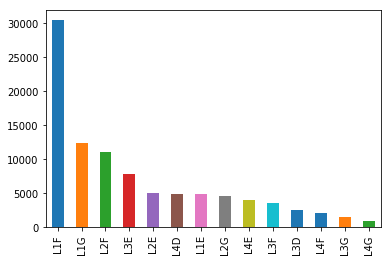

In [28]:
df['RFA Status as of 97NK'].value_counts().plot(kind='bar')

In [29]:
df['RFA Status as of 97NK'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA Status as of 97NK, dtype: int64

It seems that the entire data set is already filtered to show data for lapsing donors only. 
<p>Therefore, the 'RFA Matrix' column can be removed as well as the 'RFA Status as of 97NK' since I will not be using these as input variables anyway.

In [30]:
#create new dataset with dropped variables

df_drp = df.drop(columns=['RFA Matrix', 'RFA Status as of 97NK'])
df_drp.head()

,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,CLUSTER,AGE,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Approximation of Wealth,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
0,8901,,,,T2,36,60.0,,NaN,NaN,F,NaN,0,,,,5.0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0
1,9401,,,,S1,14,46.0,H,1.0,6.0,M,9.0,16,,,,9.0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0
2,9001,,,,R2,43,NaN,U,NaN,3.0,M,1.0,2,,,,1.0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0
3,8701,,,,R2,44,70.0,U,NaN,1.0,F,4.0,2,,,,0.0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0
4,8601,X,X,,S2,16,78.0,H,1.0,3.0,F,2.0,60,,12,,NaN,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0


#####  What other variables can be dropped or imputed (if needed)? Let's look at the percentage of missing data for the rest of the columns:

In [31]:
df_drp.columns

Index(['First Gift (YYMM)', 'Donated to In House', 'Donated to P3',
       'Has Planned Giving Record', 'Neighbhd/Socio-ec Status', 'CLUSTER',
       'AGE', 'HOMEOWNR', 'NUMCHLD', 'INCOME', 'GENDER', 'WEALTH1',
       'No. of Mail Order Responses', 'P3 Solicitation Limit',
       'In House Solicitation Limit', 'Is a major donor',
       'Approximation of Wealth', 'Median HomeVal (hundreds)',
       'Avg HomeVal (hundreds)', 'Median Rent(hundreds)', 'Avg Rent(hundreds)',
       'Median Hshold Incm (hundreds)', 'Median Family Incm (hundreds)',
       'Avg Hshold Incm (hundreds)', 'Avg Family Incm (hundreds)',
       'Per Capita Income', 'Total Amt (All Gifts)', 'Total No. (All Gifts)',
       'Total No. (All Gifts:Promos)', 'Amt (Most Recent Gift)',
       'Date of Last Gift', '2ndGft-1stGft(months)', 'Avg Amt (All Gifts)',
       'CONTROLN', 'Response (97NK Mail)', 'Amt Donated (97NK Mail)'],
      dtype='object')

In [32]:
df_drp.shape

(95412, 36)

In [33]:
#list of columns with non-numeric values (categorical):

df_drp.dtypes == 'object'

First Gift (YYMM)                False
Donated to In House               True
Donated to P3                     True
Has Planned Giving Record         True
Neighbhd/Socio-ec Status          True
CLUSTER                           True
AGE                              False
HOMEOWNR                          True
NUMCHLD                          False
INCOME                           False
GENDER                            True
WEALTH1                          False
No. of Mail Order Responses      False
P3 Solicitation Limit             True
In House Solicitation Limit       True
Is a major donor                  True
Approximation of Wealth          False
Median HomeVal (hundreds)        False
Avg HomeVal (hundreds)           False
Median Rent(hundreds)            False
Avg Rent(hundreds)               False
Median Hshold Incm (hundreds)    False
Median Family Incm (hundreds)    False
Avg Hshold Incm (hundreds)       False
Avg Family Incm (hundreds)       False
Per Capita Income        

c:\users\monica aguilar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\monica aguilar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\monica aguilar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\monica aguilar\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, wh

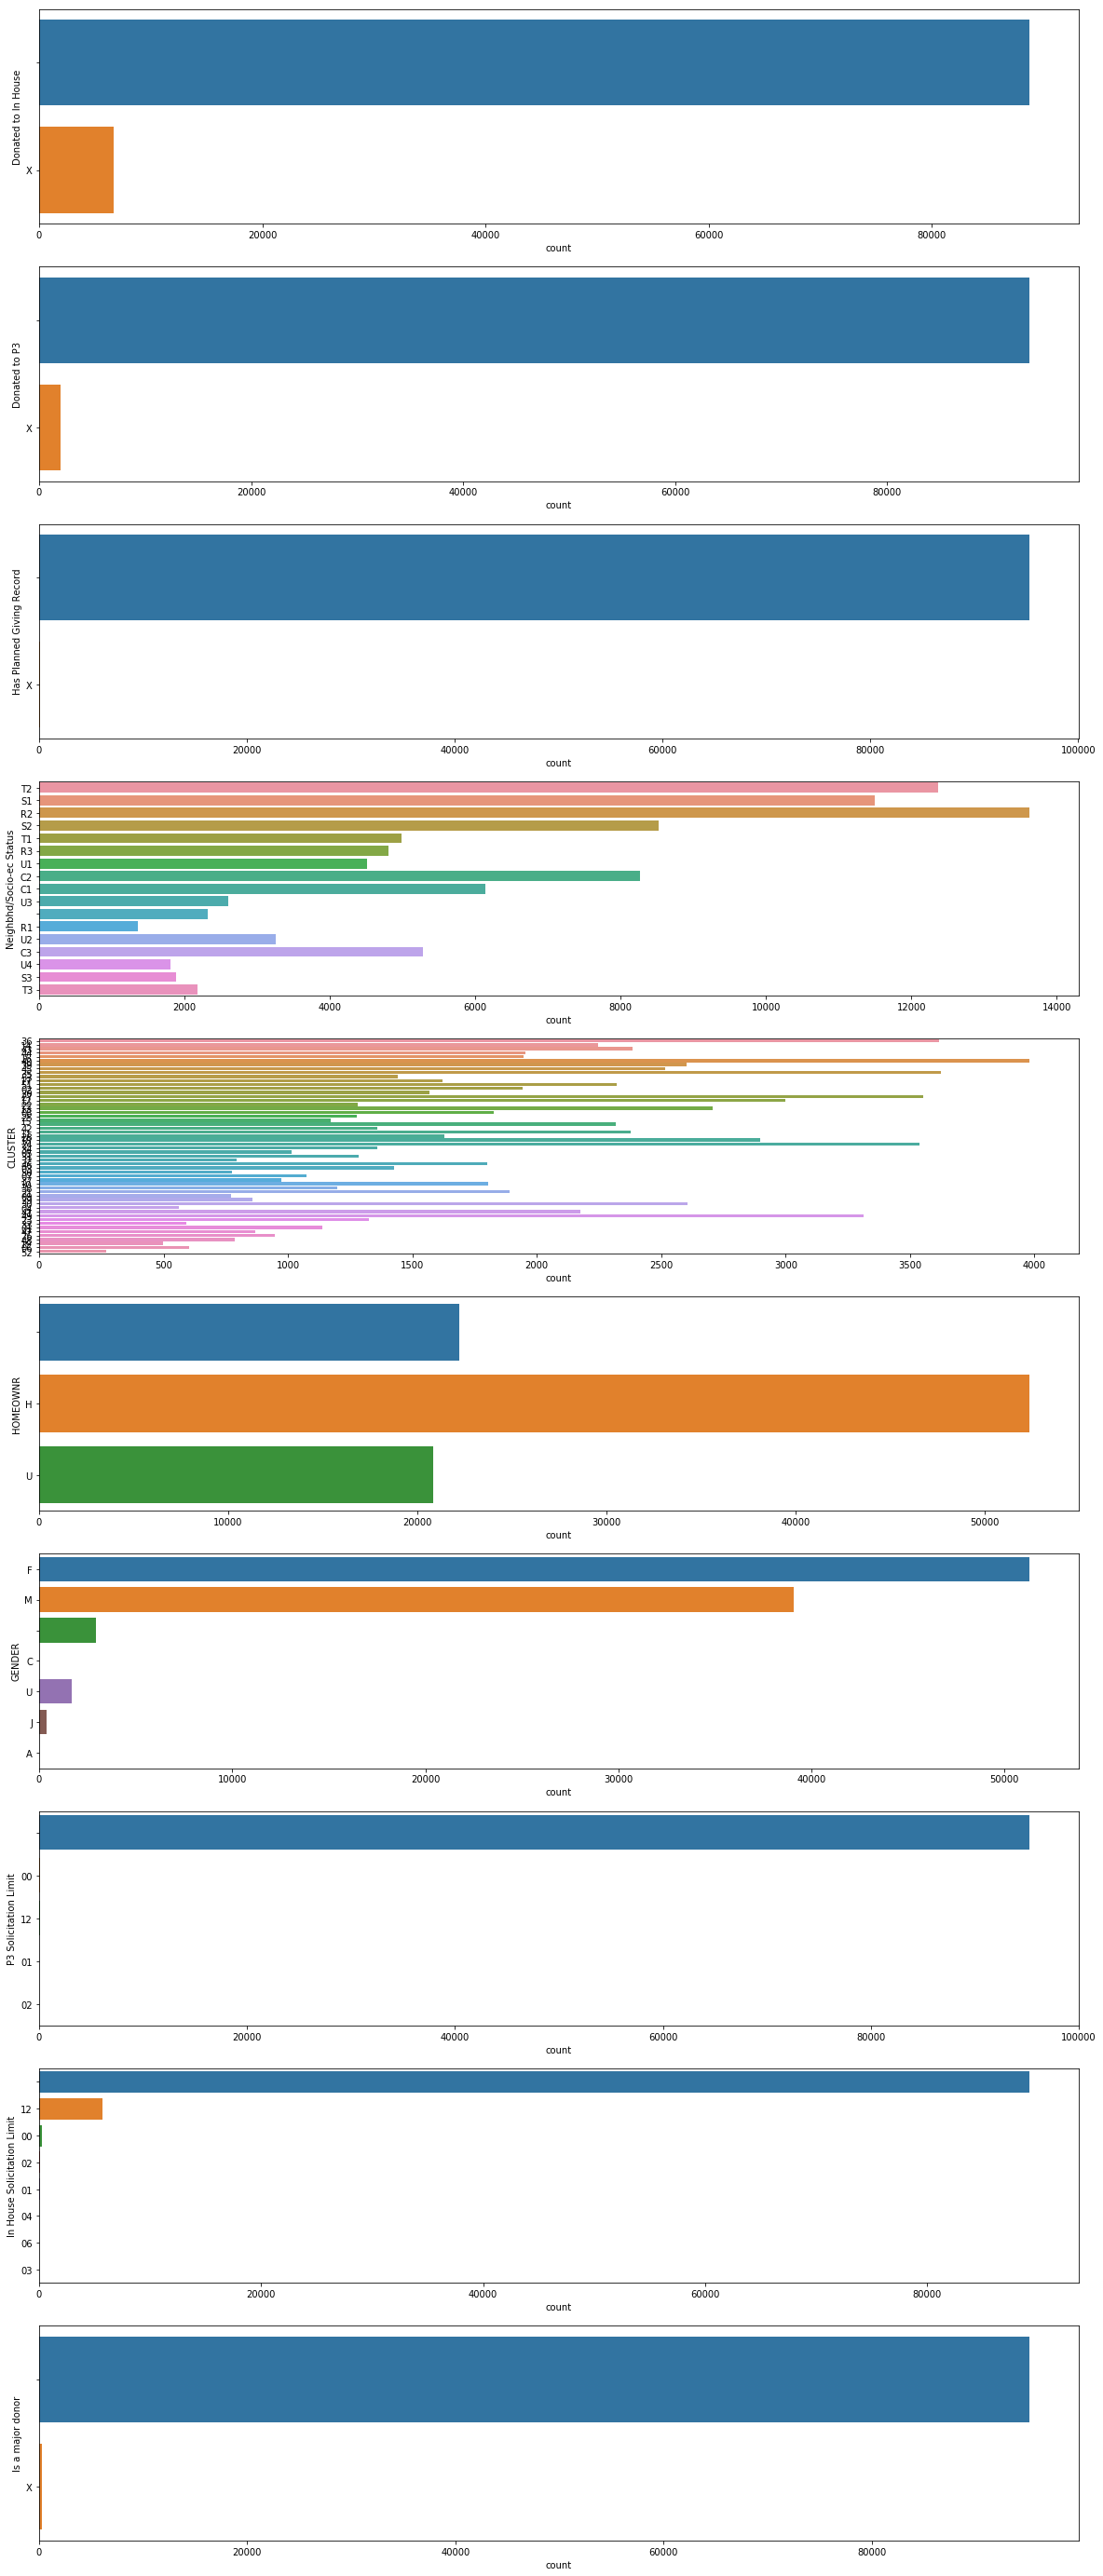

In [34]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(10, figsize=(20,50))
axes = axes.flatten()
object_bol = df_drp.dtypes == 'object'
for ax, column in zip(axes,df_drp.dtypes[object_bol].index):
    sns.countplot(y=column,data=df_drp,ax=ax)
    fig.show()

##### Study each column's unique value and see how the data can be standardized to indicate missing values and perform other exploratory processes:

In [34]:
for column in df_drp.columns:
    print(column + ':')
    print(df_drp[column].unique())
    print('=====')

First Gift (YYMM):
[8901 9401 9001 8701 8601 8801 9601 9201 9301 9501 9101 9701 8804 9302
 9509 8810 9511 9111 9009 9309 8910 9510 9212 9506 8608 9410 9209 9103
 9102 8501 8711 9310 8611 8912 9010 8704 9512 8702 8609 9205 8401 9303
 9312 8604 8612 9109 9011 8909 9003 9202 9402 8707 9012 8306]
=====
Donated to In House:
[' ' 'X']
=====
Donated to P3:
[' ' 'X']
=====
Has Planned Giving Record:
[' ' 'X']
=====
Neighbhd/Socio-ec Status:
['T2' 'S1' 'R2' 'S2' 'T1' 'R3' 'U1' 'C2' 'C1' 'U3' ' ' 'R1' 'U2' 'C3' 'U4'
 'S3' 'T3']
=====
CLUSTER:
['36' '14' '43' '44' '16' '40' '39' '45' '35' '53' '17' '51' '02' '20'
 '27' '12' '22' '13' '08' '25' '15' ' ' '42' '11' '28' '18' '24' '34' '05'
 '31' '32' '46' '03' '50' '07' '37' '10' '38' '21' '09' '29' '30' '04'
 '41' '49' '23' '33' '01' '47' '26' '48' '19' '06' '52']
=====
AGE:
[60. 46. nan 70. 78. 38. 65. 75. 72. 44. 62. 82. 74. 54. 42. 84. 49. 69.
 88. 30. 51. 66. 61. 68. 83. 45. 40. 48. 34. 80. 36. 50. 41. 71. 47. 33.
 63. 64. 59. 77. 73. 87. 89. 8

In [36]:
import numpy as np

df_drp['Donated to In House'].replace(' ', 0, inplace=True)
df_drp['Donated to In House'].replace('X', 1, inplace=True)
df_drp['Donated to P3'].replace(' ', 0, inplace=True)
df_drp['Donated to P3'].replace('X', 1, inplace=True)
df_drp['Has Planned Giving Record'].replace(' ', 0, inplace=True)
df_drp['Has Planned Giving Record'].replace('X', 1, inplace=True)
df_drp['Neighbhd/Socio-ec Status'].replace(' ', np.nan, inplace=True)
df_drp['CLUSTER'].replace(' ', np.nan, inplace=True)
df_drp['AGE'].replace(0, np.nan, inplace=True)
df_drp['HOMEOWNR'].replace(' ', np.nan, inplace=True)
df_drp['GENDER'].replace(' ', np.nan, inplace=True)
df_drp['P3 Solicitation Limit'].replace(' ', 0, inplace=True)
df_drp['In House Solicitation Limit'].replace(' ', 0, inplace=True)
df_drp['Is a major donor'].replace(' ', 0, inplace=True)
df_drp['Is a major donor'].replace('X', 1, inplace=True)

for column in df_drp.columns:
    print(column + ':')
    print(df_drp[column].unique())
    print('=====')

First Gift (YYMM):
[8901 9401 9001 8701 8601 8801 9601 9201 9301 9501 9101 9701 8804 9302
 9509 8810 9511 9111 9009 9309 8910 9510 9212 9506 8608 9410 9209 9103
 9102 8501 8711 9310 8611 8912 9010 8704 9512 8702 8609 9205 8401 9303
 9312 8604 8612 9109 9011 8909 9003 9202 9402 8707 9012 8306]
=====
Donated to In House:
[0 1]
=====
Donated to P3:
[0 1]
=====
Has Planned Giving Record:
[0 1]
=====
Neighbhd/Socio-ec Status:
['T2' 'S1' 'R2' 'S2' 'T1' 'R3' 'U1' 'C2' 'C1' 'U3' nan 'R1' 'U2' 'C3' 'U4'
 'S3' 'T3']
=====
CLUSTER:
['36' '14' '43' '44' '16' '40' '39' '45' '35' '53' '17' '51' '02' '20'
 '27' '12' '22' '13' '08' '25' '15' nan '42' '11' '28' '18' '24' '34' '05'
 '31' '32' '46' '03' '50' '07' '37' '10' '38' '21' '09' '29' '30' '04'
 '41' '49' '23' '33' '01' '47' '26' '48' '19' '06' '52']
=====
AGE:
[60. 46. nan 70. 78. 38. 65. 75. 72. 44. 62. 82. 74. 54. 42. 84. 49. 69.
 88. 30. 51. 66. 61. 68. 83. 45. 40. 48. 34. 80. 36. 50. 41. 71. 47. 33.
 63. 64. 59. 77. 73. 87. 89. 86. 52. 76. 2

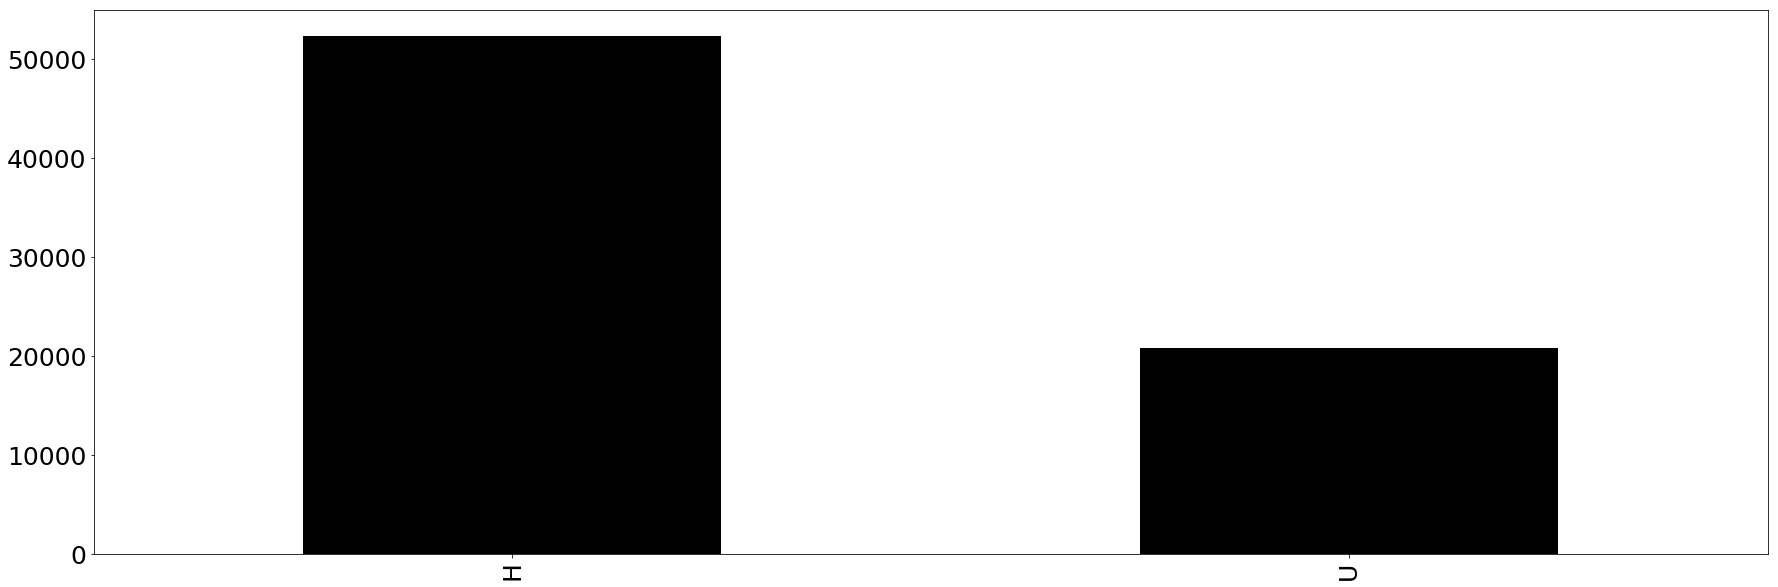

In [37]:
df_drp['HOMEOWNR'].value_counts().plot(kind='bar',figsize=(30,10), fontsize=25, colormap='cubehelix')

In [38]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df_drp.isnull(),cbar=False, xticklabels=True)

NameError: name 'sns' is not defined

<Figure size 1440x720 with 0 Axes>

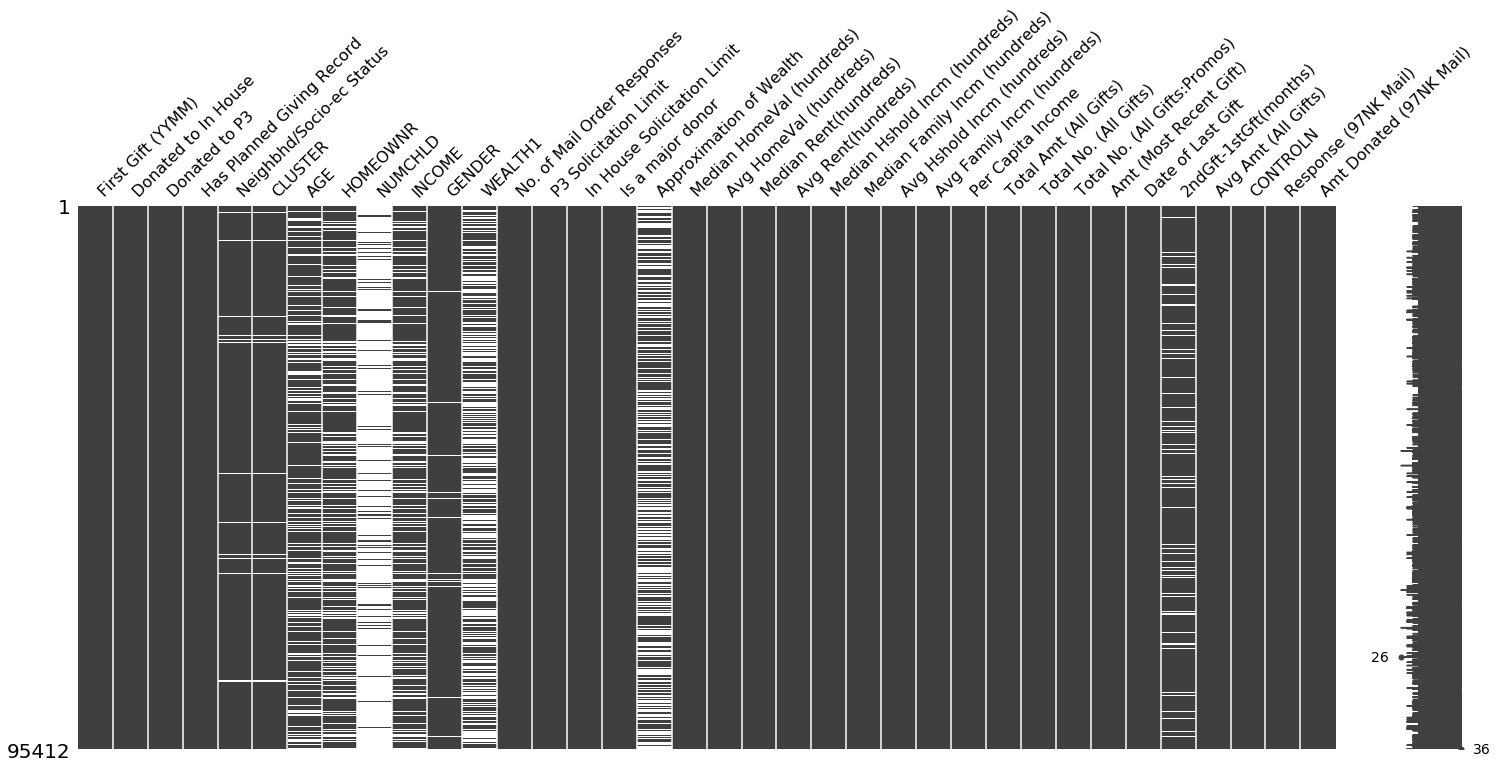

In [39]:
#another way to produce the missing value heatmap using missingno

import missingno as msno

msno.matrix(df_drp)

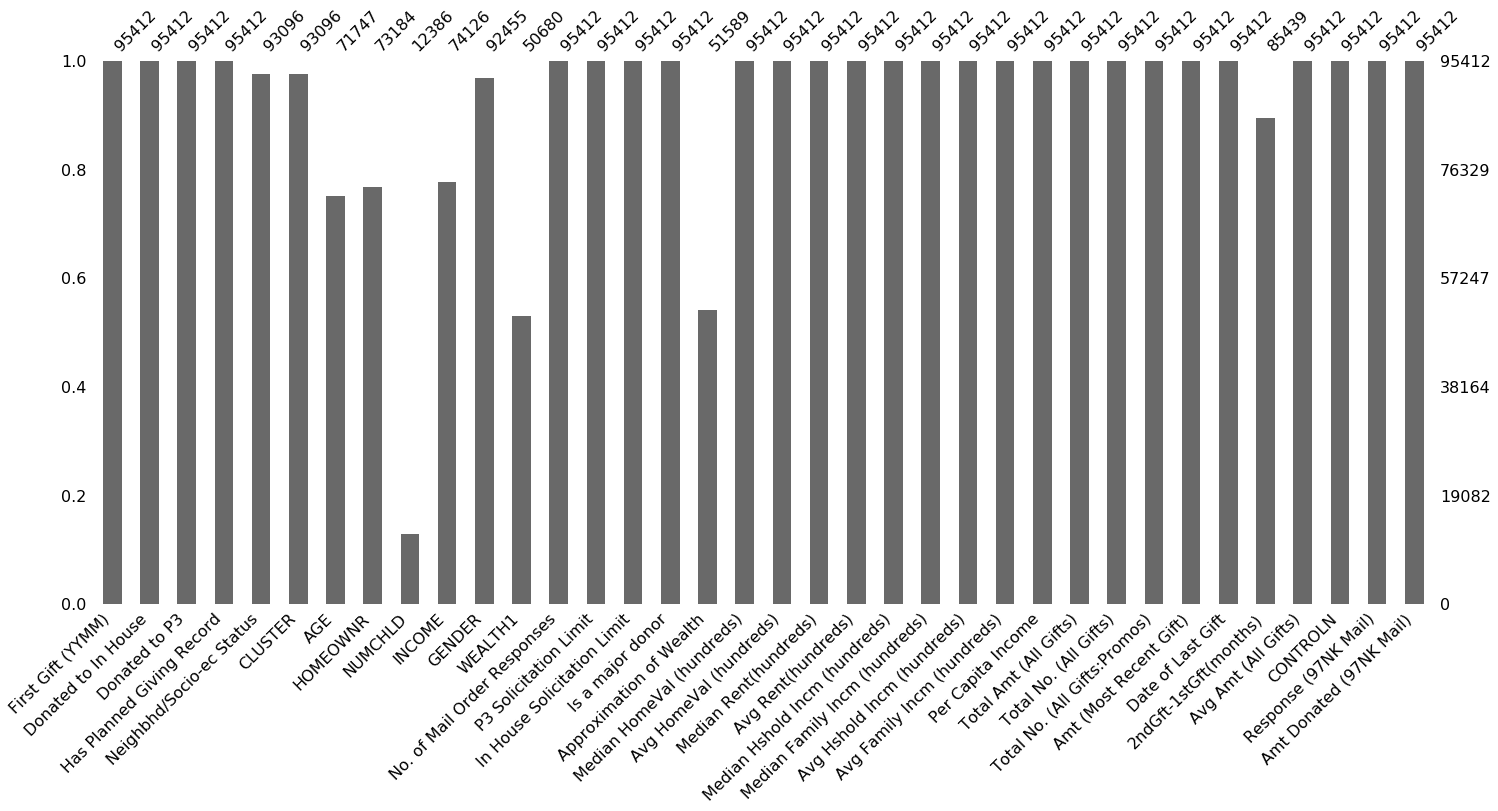

In [40]:
msno.bar(df_drp)

<strong> Based on these heatmaps, I will:</strong>
<br>
<br> 1. drop 'HOMEOWNR', 'NUMCHLD', 'WEALTH1' and 'Approximation of Wealth' columns (will use other variables to approximate wealth)
<br> 2. impute 'Neigbhd/Socio-ec Status', 'CLUSTER', 'AGE', 'INCOME', 'GENDER', '2ndGft-1stGft(months)'

In [41]:
df_drp2 = df_drp.drop(columns=['HOMEOWNR', 'NUMCHLD', 'WEALTH1', 'Approximation of Wealth'])
df_drp2.head()

,First Gift (YYMM),Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,CLUSTER,AGE,INCOME,GENDER,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail)
0,8901,0,0,0,T2,36,60.0,NaN,F,0,0,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0
1,9401,0,0,0,S1,14,46.0,6.0,M,16,0,0,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0
2,9001,0,0,0,R2,43,NaN,3.0,M,2,0,0,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0
3,8701,0,0,0,R2,44,70.0,1.0,F,2,0,0,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0
4,8601,1,1,0,S2,16,78.0,3.0,F,60,0,12,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0


<h3>Imputation</h3>

- For variables whose missing values comprise of only about 3% of the total observations based on the msno bar graph, I will impute with a global measure of central tendency. Since these are all categorical variables, I will impute their missing values with the most common value (global mode per variable):
<br>
<br> - 'Neigbhd/Socio-ec Status'
<br> - 'CLUSTER'
<br> - 'GENDER'

In [42]:
df_drp2['Neighbhd/Socio-ec Status'].fillna(df_drp2['Neighbhd/Socio-ec Status'].mode()[0], inplace=True)
df_drp2['CLUSTER'].fillna(df_drp2['CLUSTER'].mode()[0], inplace=True)
df_drp2['GENDER'].fillna(df_drp2['GENDER'].mode()[0], inplace=True)

- For the remaining missing variables, since these are continuous, I will try using linear regression to predict their supposed values:
<br>
<br> - 'AGE'
<br> - 'INCOME'
<br> - '2ndGft-1stGft(months)'

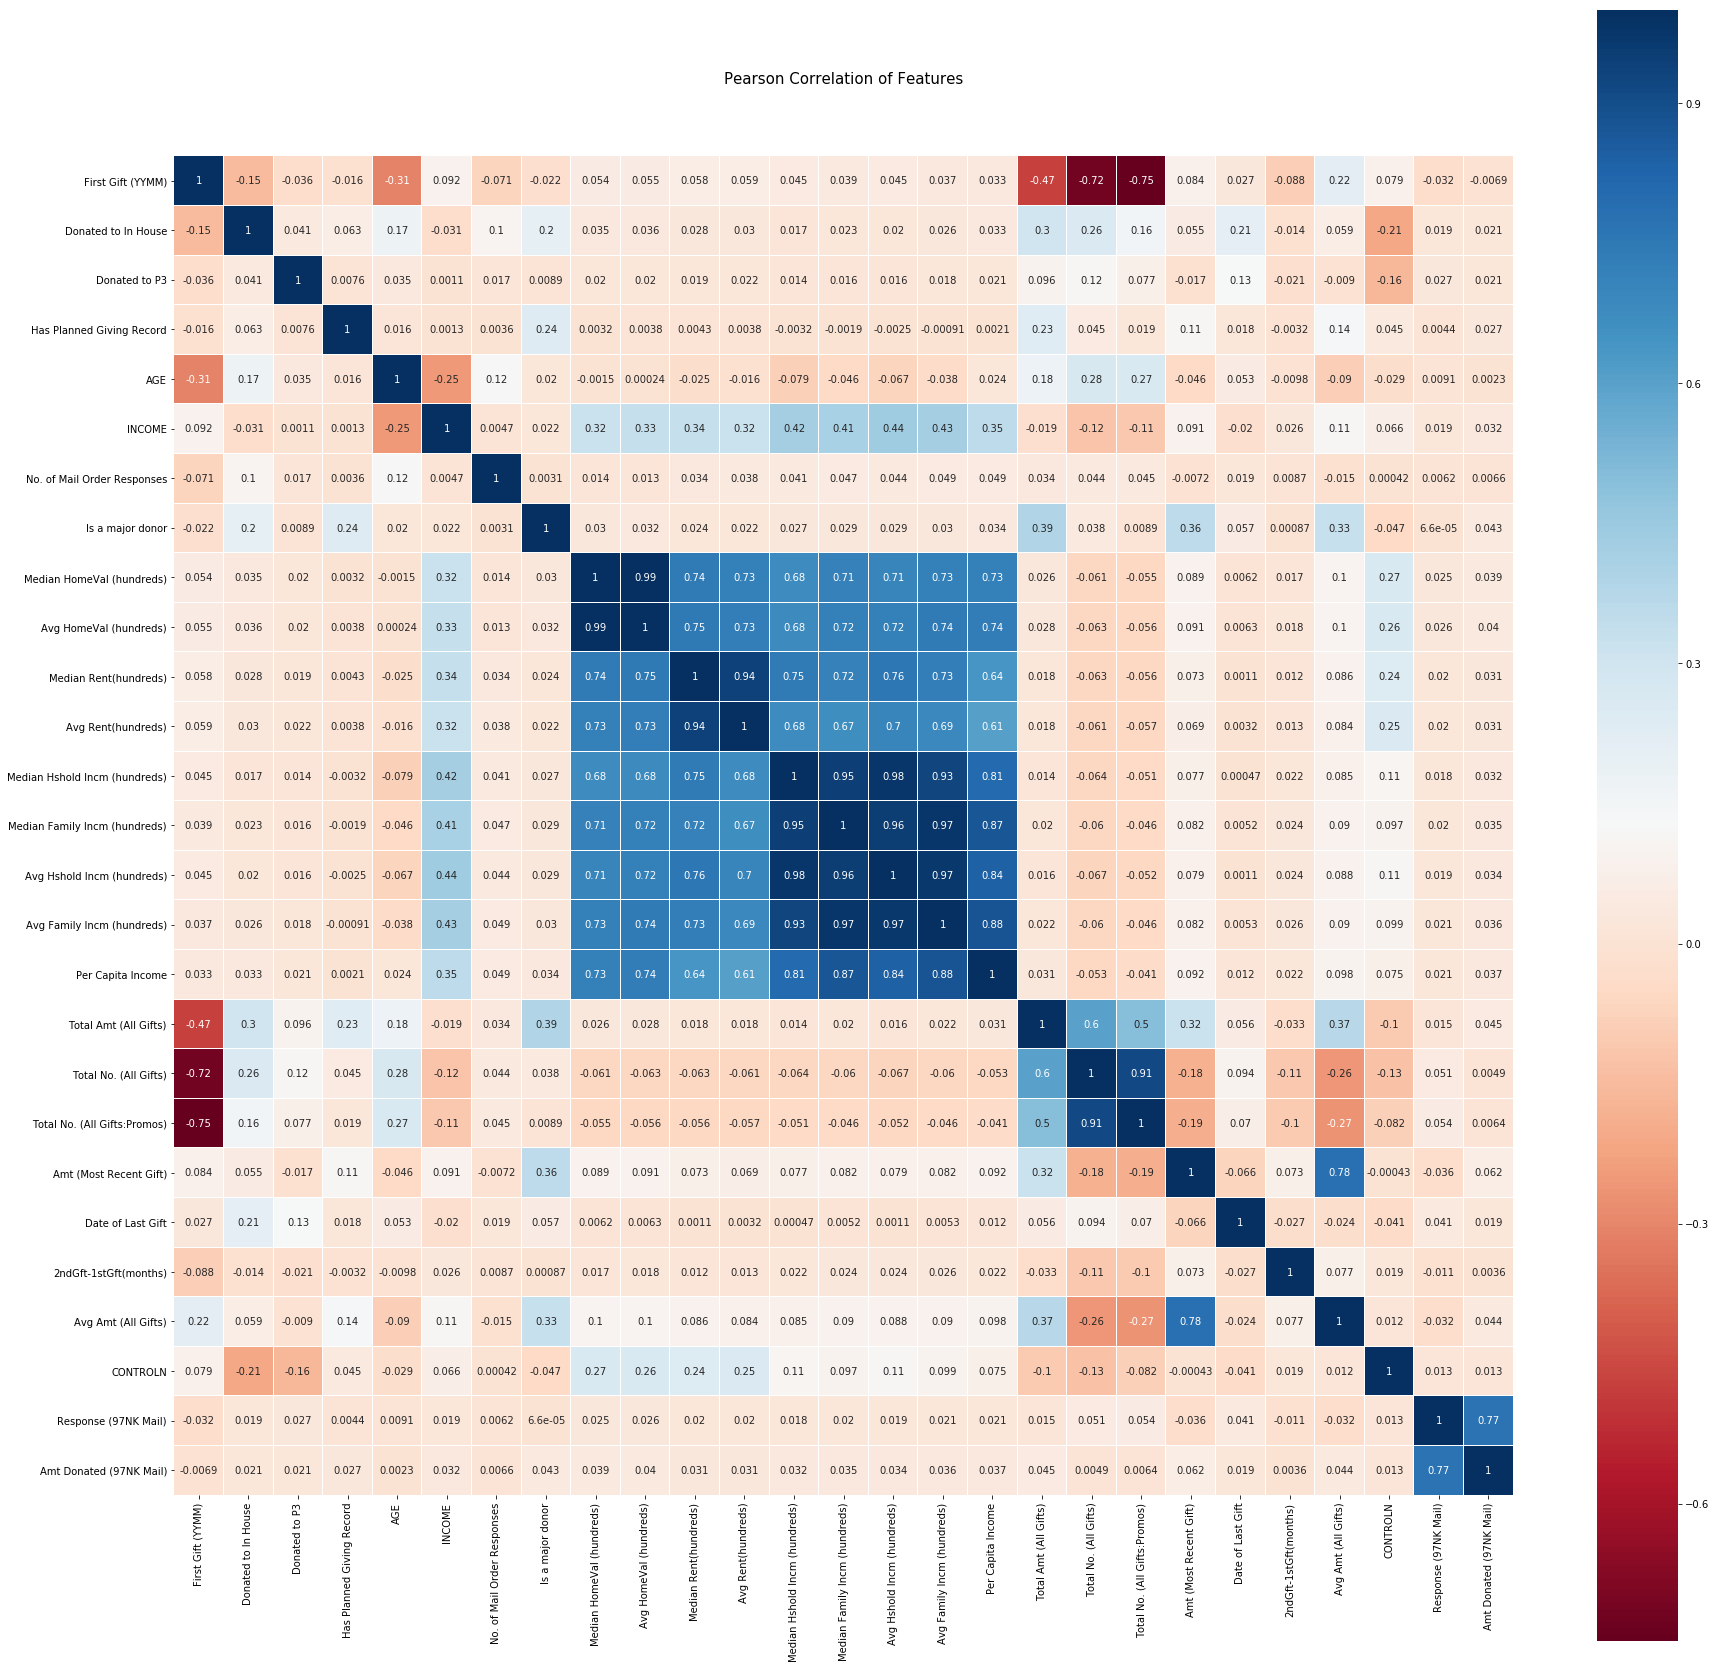

In [44]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_drp2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

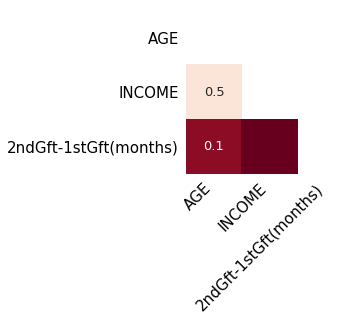

In [45]:
# Nullity Correlation 

msno.heatmap(df_drp2, figsize=(3,3), fontsize=15)

Based on the Pearson correlation matrix above, variables that correlated the highest (either positively or negatively) with 'AGE' are the ff:
- 'First Gift (YYMM)'
- <strike>'INCOME'</strike>
- 'Total No. (All Gifts)'
- 'Total No. (All Gifts:Promos)'

However, I will not use 'INCOME' since it has a moderately high nullity correlation with 'AGE'. The rest do not have missing values, so I will use these for the linear model.

###### I changed my mind lol, not gonna use regression-based single imputation since it might result in reduced variability and introduce some bias in the analysis

###### Instead, I will use multiple imputation using chained equation approach found on <a href = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/">this paper</a>:

since it appears to produce unbiased estimates and captures the uncertainty of the replacement values
<br> - 'AGE'
<br> - 'INCOME'
<br> - '2ndGft-1stGft(months)'

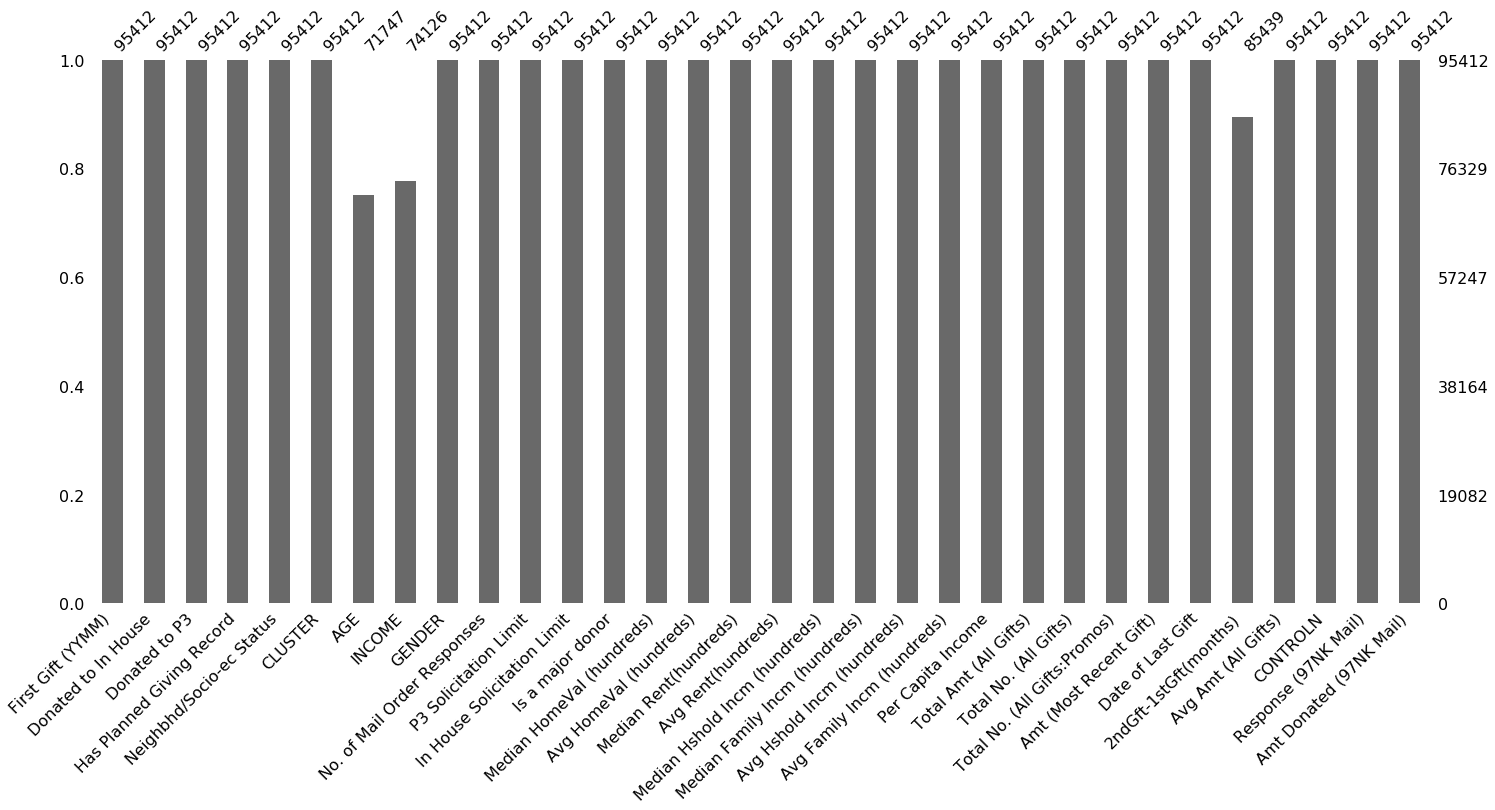

In [46]:
msno.bar(df_drp2)

##### Changed my mind again, fml. Can't find a quick and easy module to use for MICE implementation in python. So, in the interest of time I'm just going to use Mean/Median + groupby

- 'AGE' 
- 'INCOME' 
- '2ndGft-1stGft(months)'

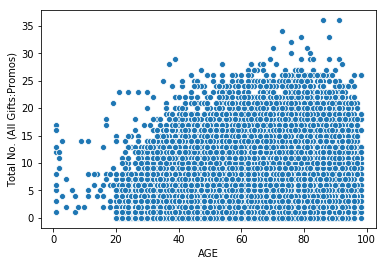

In [47]:
ax = sns.scatterplot(x="AGE", y='Total No. (All Gifts:Promos)', data=df_drp2)

In [47]:
not_obj = df_drp2.dtypes != 'object'

In [48]:
df_drp2_exp = df_drp2.select_dtypes(include=['float','number'])
df_drp2_exp.columns
df_drp2.columns

Index(['First Gift (YYMM)', 'Donated to In House', 'Donated to P3',
       'Has Planned Giving Record', 'Neighbhd/Socio-ec Status', 'CLUSTER',
       'AGE', 'INCOME', 'GENDER', 'No. of Mail Order Responses',
       'P3 Solicitation Limit', 'In House Solicitation Limit',
       'Is a major donor', 'Median HomeVal (hundreds)',
       'Avg HomeVal (hundreds)', 'Median Rent(hundreds)', 'Avg Rent(hundreds)',
       'Median Hshold Incm (hundreds)', 'Median Family Incm (hundreds)',
       'Avg Hshold Incm (hundreds)', 'Avg Family Incm (hundreds)',
       'Per Capita Income', 'Total Amt (All Gifts)', 'Total No. (All Gifts)',
       'Total No. (All Gifts:Promos)', 'Amt (Most Recent Gift)',
       'Date of Last Gift', '2ndGft-1stGft(months)', 'Avg Amt (All Gifts)',
       'CONTROLN', 'Response (97NK Mail)', 'Amt Donated (97NK Mail)'],
      dtype='object')

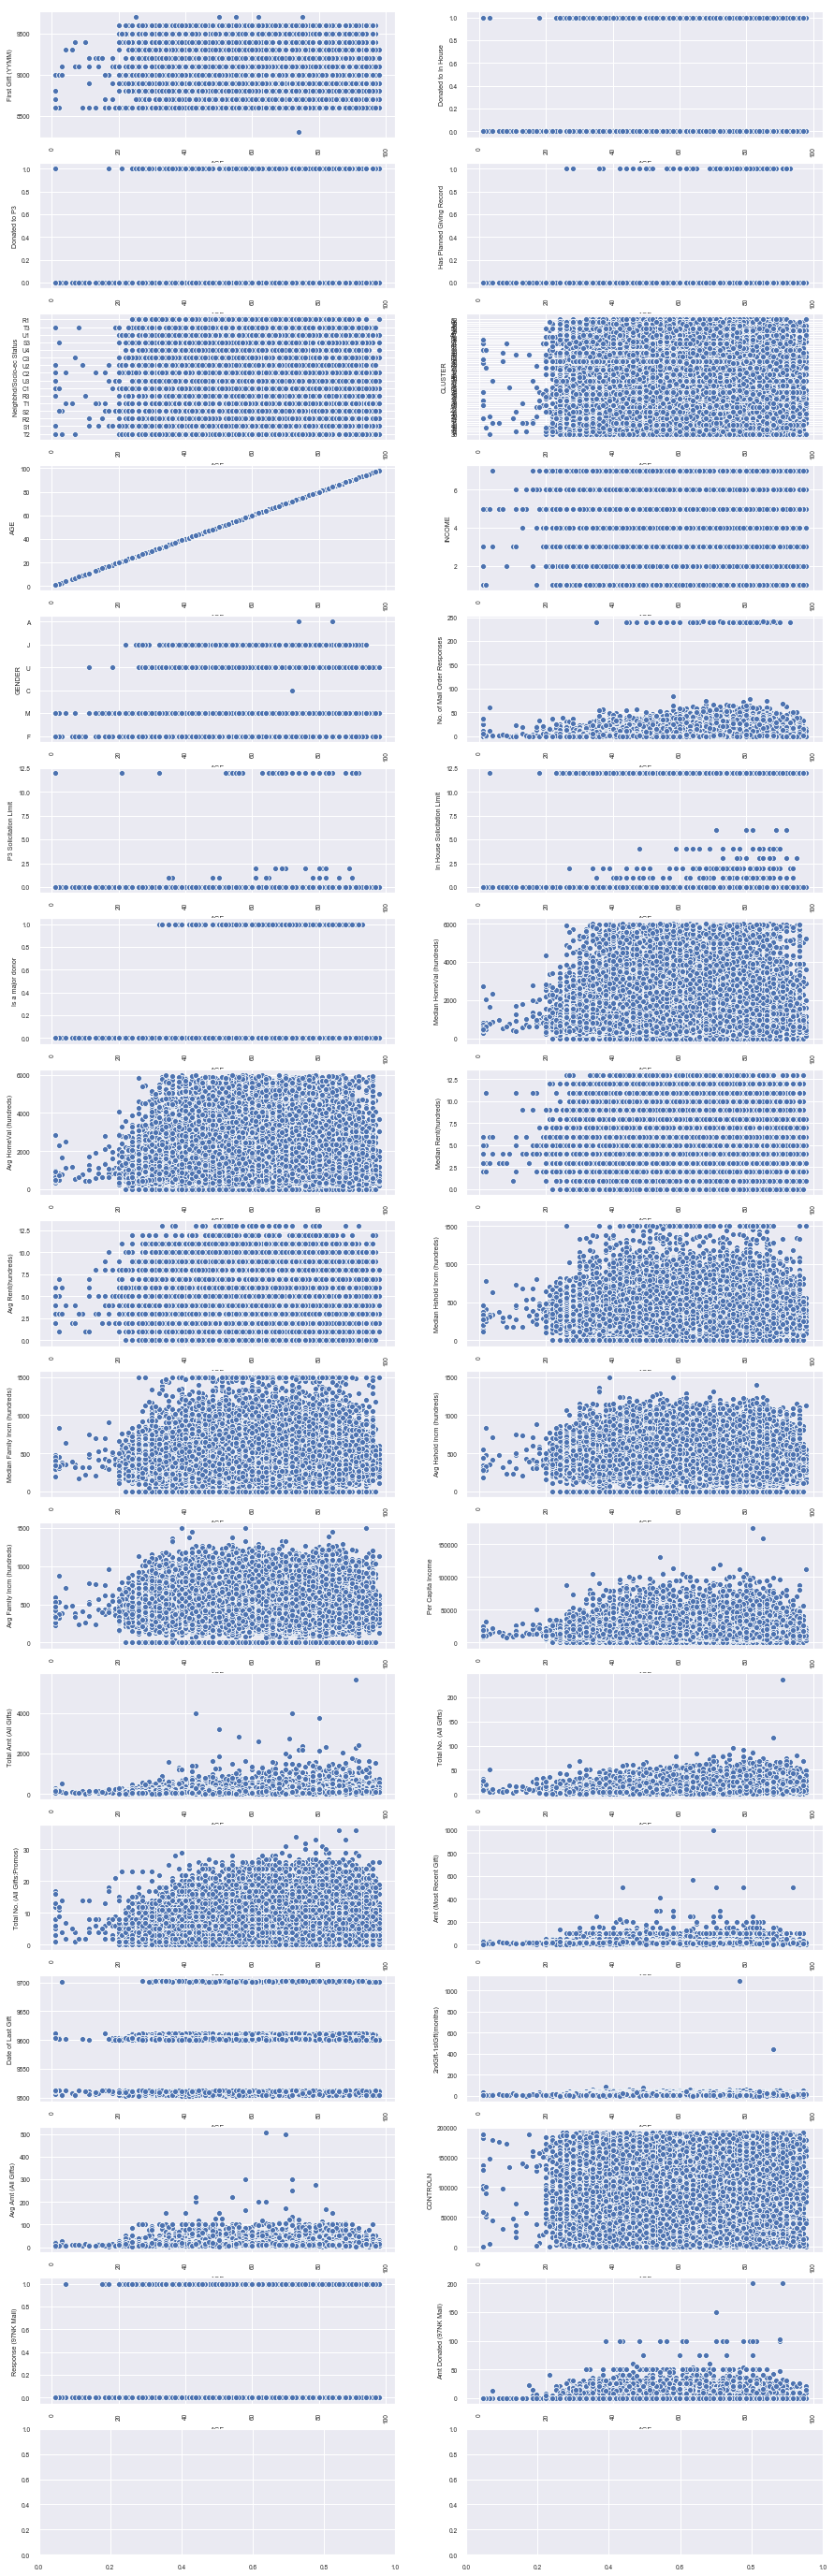

In [56]:
fig, ax = plt.subplots(17, 2, figsize=(15, 50))
for var, subplot in zip(df_drp2.columns, ax.flatten()):
    sns.set(font_scale=1)
    sns.scatterplot(y=var, x='AGE', data=df_drp2, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

##### Will use 'Total No. (All Gifts:Promos)' as the grouping variable since it scored relatively high in terms of (+)correlation coefficient and since by looking at the scatterplot, 'AGE' appears to be distributed roughly evenly without having a curve that it too flat or too steep.

In [49]:
df_drp2['AGE'].fillna(df_drp2.groupby('Total No. (All Gifts:Promos)')['AGE'].transform('mean'),inplace=True)
# I used mean since the scatterplot does not indicate outliers

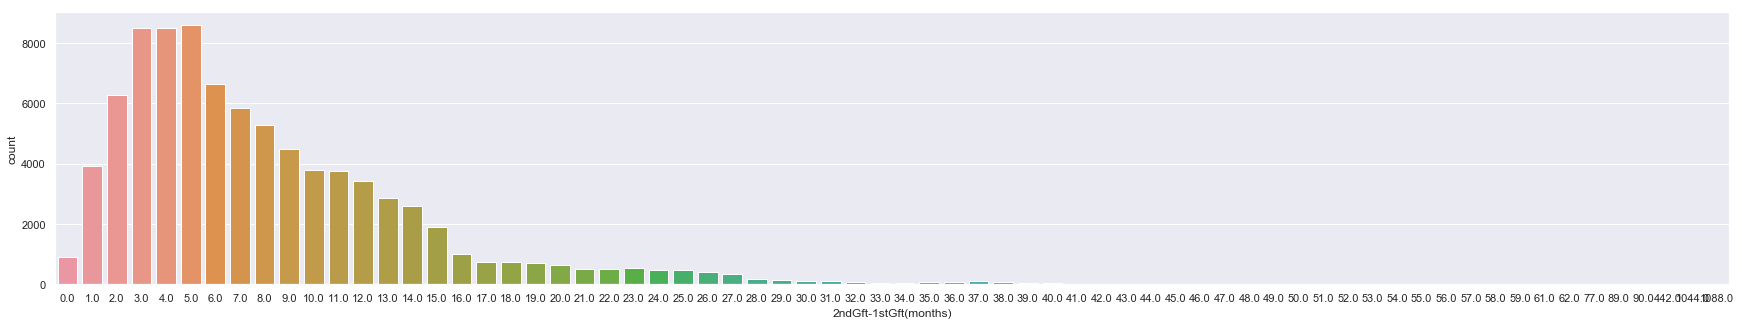

In [50]:
sns.set(rc={'figure.figsize':(30,5)})
ax3 = sns.countplot(x="2ndGft-1stGft(months)", data=df_drp2)

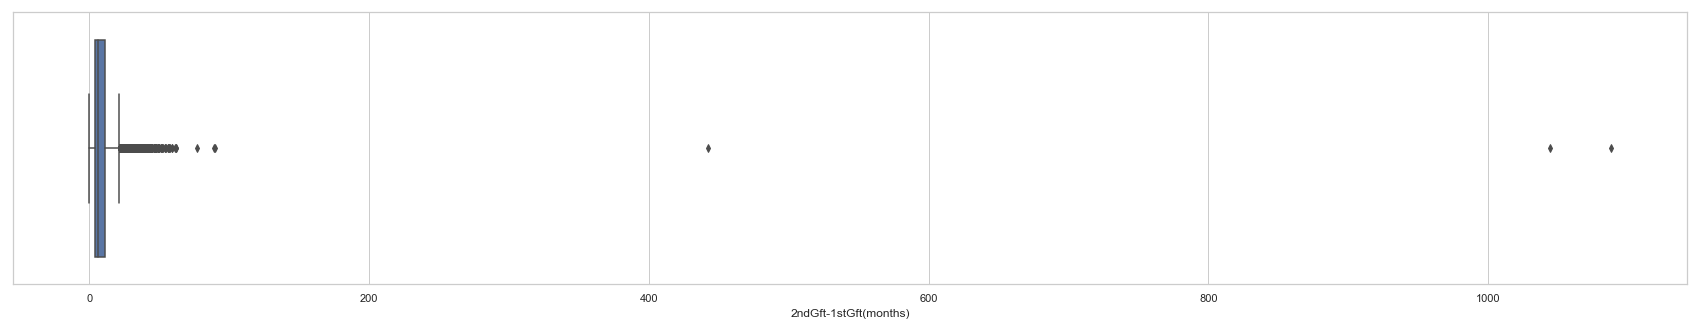

In [51]:
sns.set(style="whitegrid")
ax3_5 = sns.boxplot(x=df_drp2["2ndGft-1stGft(months)"])

##### Since '2ndGft-1stGft(months)' has very weak correlations with other variables and has plenty of outliers within the dataset, I will do single imputation by the variable's global median.

In [52]:
df_drp2['2ndGft-1stGft(months)'].replace(np.nan, df_drp2[df_drp2['2ndGft-1stGft(months)']!=np.nan]['2ndGft-1stGft(months)'].median(), inplace=True)

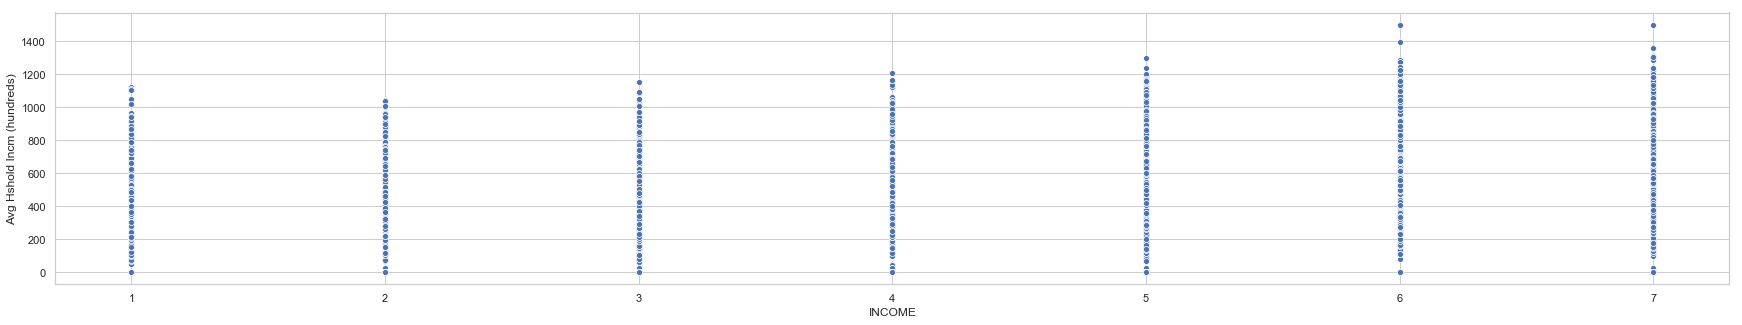

In [53]:
ax2 = sns.scatterplot(x="INCOME", y='Avg Hshold Incm (hundreds)', data=df_drp2)

##### Will drop 'INCOME' since it appears to be a categorical variable but the dataset dictionary did not offer any explanation.
##### Will also drop 'First Gift (YYMM)' (since I can use the length of time between the 1st and 2nd gift to indicate possible donating habits).

In [63]:
df_drp3 = df_drp2.drop(columns=['INCOME','First Gift (YYMM)'])

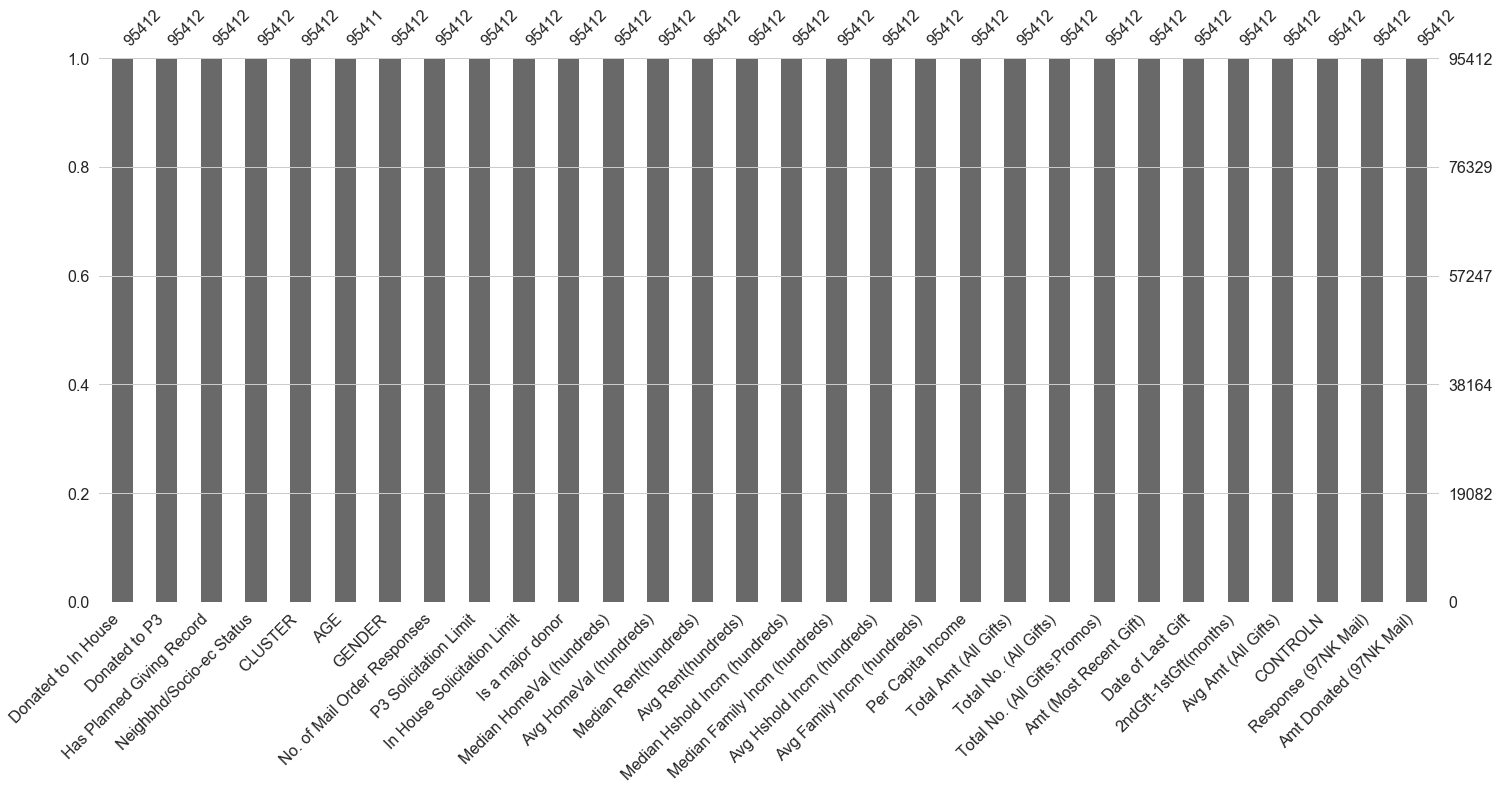

In [64]:
msno.bar(df_drp3)

##### Transform variables if necessary

In [65]:
for column in df_drp3.columns:
    print(column + ':')
    print(df_drp3[column].unique())
    print('=====')

Donated to In House:
[0 1]
=====
Donated to P3:
[0 1]
=====
Has Planned Giving Record:
[0 1]
=====
Neighbhd/Socio-ec Status:
['T2' 'S1' 'R2' 'S2' 'T1' 'R3' 'U1' 'C2' 'C1' 'U3' 'R1' 'U2' 'C3' 'U4'
 'S3' 'T3']
=====
CLUSTER:
['36' '14' '43' '44' '16' '40' '39' '45' '35' '53' '17' '51' '02' '20'
 '27' '12' '22' '13' '08' '25' '15' '42' '11' '28' '18' '24' '34' '05'
 '31' '32' '46' '03' '50' '07' '37' '10' '38' '21' '09' '29' '30' '04'
 '41' '49' '23' '33' '01' '47' '26' '48' '19' '06' '52']
=====
AGE:
[60.         46.         69.34925094 70.         78.         59.37593225
 38.         60.58580986 65.17025611 65.         56.4732581  75.
 72.         44.         62.         82.         57.87652936 74.
 54.         42.         84.         49.         63.22476587 69.
 62.58511838 64.99874655 88.         30.         51.         66.
 61.         68.         83.         45.         40.         48.
 34.         80.         36.         50.         41.         71.
 56.00562463 47.         33.     

In [66]:
# Transform 'Neighbhd/Socio-ec Status' to categories of 'Low', 'Mid', 'High'

for i in range(len(df_drp3['Neighbhd/Socio-ec Status'])):
    if df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'U':
        df_drp3['Neighborhood'] = 'Urban'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'C':
        df_drp3['Neighborhood'] = 'City'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'S':
        df_drp3['Neighborhood'] = 'Suburban'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'T':
        df_drp3['Neighborhood'] = 'Town'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'R':
        df_drp3['Neighborhood'] = 'Rural'
    else:
        df_drp3['Neighborhood'] = np.nan

for i in range(len(df_drp3['Neighbhd/Socio-ec Status'])):
    if df_drp3['Neighbhd/Socio-ec Status'][i][0] == 'U':
        if df_drp3['Neighbhd/Socio-ec Status'][i][1] == 1:
            df_drp3['Socio-economic Status'] = 'High'
        elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 2:
            df_drp3['Socio-economic Status'] = 'Mid'
        elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 3:
            df_drp3['Socio-economic Status'] = 'Mid'
        elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 4:
            df_drp3['Socio-economic Status'] = 'Low'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 1:
            df_drp3['Socio-economic Status'] = 'High'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 2:
            df_drp3['Socio-economic Status'] = 'Mid'
    elif df_drp3['Neighbhd/Socio-ec Status'][i][1] == 3:
            df_drp3['Socio-economic Status'] = 'Low'

In [67]:
#Check again, which other vars I can drop

for column in df_drp3.columns:
    print(column + ':')
    print(df_drp3[column].unique())
    print('=====')
    
#df_drp4 = df_drp3.drop(columns=['Neighbhd/Socio-ec Status',])

Donated to In House:
[0 1]
=====
Donated to P3:
[0 1]
=====
Has Planned Giving Record:
[0 1]
=====
Neighbhd/Socio-ec Status:
['T2' 'S1' 'R2' 'S2' 'T1' 'R3' 'U1' 'C2' 'C1' 'U3' 'R1' 'U2' 'C3' 'U4'
 'S3' 'T3']
=====
CLUSTER:
['36' '14' '43' '44' '16' '40' '39' '45' '35' '53' '17' '51' '02' '20'
 '27' '12' '22' '13' '08' '25' '15' '42' '11' '28' '18' '24' '34' '05'
 '31' '32' '46' '03' '50' '07' '37' '10' '38' '21' '09' '29' '30' '04'
 '41' '49' '23' '33' '01' '47' '26' '48' '19' '06' '52']
=====
AGE:
[60.         46.         69.34925094 70.         78.         59.37593225
 38.         60.58580986 65.17025611 65.         56.4732581  75.
 72.         44.         62.         82.         57.87652936 74.
 54.         42.         84.         49.         63.22476587 69.
 62.58511838 64.99874655 88.         30.         51.         66.
 61.         68.         83.         45.         40.         48.
 34.         80.         36.         50.         41.         71.
 56.00562463 47.         33.     

##### Create dummy variables

In [68]:
#Create dummies one variable at a time to avoid memory error
df_drp3 = pd.get_dummies(df_drp3, columns=['CLUSTER'])

In [69]:
df_drp3.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,AGE,GENDER,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),Neighborhood,CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53
0,0,0,0,T2,60.000000,F,0,0,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,S1,46.000000,M,16,0,0,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,R2,69.349251,M,2,0,0,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,R2,70.000000,F,2,0,0,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,S2,78.000000,F,60,0,12,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df_drp3 = pd.get_dummies(df_drp3, columns=['GENDER'])

In [71]:
df_drp3.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,AGE,No. of Mail Order Responses,P3 Solicitation Limit,In House Solicitation Limit,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),Neighborhood,CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U
0,0,0,0,T2,60.000000,0,0,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,S1,46.000000,16,0,0,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,R2,69.349251,2,0,0,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,R2,70.000000,2,0,0,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,S2,78.000000,60,0,12,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
df_drp3 = pd.get_dummies(df_drp3, columns=['P3 Solicitation Limit'])

In [73]:
df_drp3.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,AGE,No. of Mail Order Responses,In House Solicitation Limit,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),Neighborhood,CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,P3 Solicitation Limit_0,P3 Solicitation Limit_00,P3 Solicitation Limit_01,P3 Solicitation Limit_02,P3 Solicitation Limit_12
0,0,0,0,T2,60.000000,0,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,S1,46.000000,16,0,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,R2,69.349251,2,0,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,R2,70.000000,2,0,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,0,S2,78.000000,60,12,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [74]:
df_drp3 = pd.get_dummies(df_drp3, columns=['In House Solicitation Limit'])

In [75]:
df_drp3.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,Neighbhd/Socio-ec Status,AGE,No. of Mail Order Responses,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),Neighborhood,CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,P3 Solicitation Limit_0,P3 Solicitation Limit_00,P3 Solicitation Limit_01,P3 Solicitation Limit_02,P3 Solicitation Limit_12,In House Solicitation Limit_0,In House Solicitation Limit_00,In House Solicitation Limit_01,In House Solicitation Limit_02,In House Solicitation Limit_03,In House Solicitation Limit_04,In House Solicitation Limit_06,In House Solicitation Limit_12
0,0,0,0,T2,60.000000,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,S1,46.000000,16,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,R2,69.349251,2,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,R2,70.000000,2,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,S2,78.000000,60,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [76]:
df_drp3 = pd.get_dummies(df_drp3, columns=['Neighbhd/Socio-ec Status'])

In [77]:
df_drp3.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,AGE,No. of Mail Order Responses,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),Date of Last Gift,2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),Neighborhood,CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,P3 Solicitation Limit_0,P3 Solicitation Limit_00,P3 Solicitation Limit_01,P3 Solicitation Limit_02,P3 Solicitation Limit_12,In House Solicitation Limit_0,In House Solicitation Limit_00,In House Solicitation Limit_01,In House Solicitation Limit_02,In House Solicitation Limit_03,In House Solicitation Limit_04,In House Solicitation Limit_06,In House Solicitation Limit_12,Neighbhd/Socio-ec Status_C1,Neighbhd/Socio-ec Status_C2,Neighbhd/Socio-ec Status_C3,Neighbhd/Socio-ec Status_R1,Neighbhd/Socio-ec Status_R2,Neighbhd/Socio-ec Status_R3,Neighbhd/Socio-ec Status_S1,Neighbhd/Socio-ec Status_S2,Neighbhd/Socio-ec Status_S3,Neighbhd/Socio-ec Status_T1,Neighbhd/Socio-ec Status_T2,Neighbhd/Socio-ec Status_T3,Neighbhd/Socio-ec Status_U1,Neighbhd/Socio-ec Status_U2,Neighbhd/Socio-ec Status_U3,Neighbhd/Socio-ec Status_U4
0,0,0,0,60.000000,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,9512,4.0,7.741935,95515,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,46.000000,16,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,9512,18.0,15.666667,148535,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,69.349251,2,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,9512,12.0,7.481481,15078,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,70.000000,2,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9512,9.0,6.812500,172556,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,78.000000,60,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,9601,14.0,6.864865,7112,0,0.0,City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [78]:
df_drp4 = df_drp3.drop(columns=['Date of Last Gift','Neighborhood']) 

In [79]:
df_drp4.head()

,Donated to In House,Donated to P3,Has Planned Giving Record,AGE,No. of Mail Order Responses,Is a major donor,Median HomeVal (hundreds),Avg HomeVal (hundreds),Median Rent(hundreds),Avg Rent(hundreds),Median Hshold Incm (hundreds),Median Family Incm (hundreds),Avg Hshold Incm (hundreds),Avg Family Incm (hundreds),Per Capita Income,Total Amt (All Gifts),Total No. (All Gifts),Total No. (All Gifts:Promos),Amt (Most Recent Gift),2ndGft-1stGft(months),Avg Amt (All Gifts),CONTROLN,Response (97NK Mail),Amt Donated (97NK Mail),CLUSTER_01,CLUSTER_02,CLUSTER_03,CLUSTER_04,CLUSTER_05,CLUSTER_06,CLUSTER_07,CLUSTER_08,CLUSTER_09,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,P3 Solicitation Limit_0,P3 Solicitation Limit_00,P3 Solicitation Limit_01,P3 Solicitation Limit_02,P3 Solicitation Limit_12,In House Solicitation Limit_0,In House Solicitation Limit_00,In House Solicitation Limit_01,In House Solicitation Limit_02,In House Solicitation Limit_03,In House Solicitation Limit_04,In House Solicitation Limit_06,In House Solicitation Limit_12,Neighbhd/Socio-ec Status_C1,Neighbhd/Socio-ec Status_C2,Neighbhd/Socio-ec Status_C3,Neighbhd/Socio-ec Status_R1,Neighbhd/Socio-ec Status_R2,Neighbhd/Socio-ec Status_R3,Neighbhd/Socio-ec Status_S1,Neighbhd/Socio-ec Status_S2,Neighbhd/Socio-ec Status_S3,Neighbhd/Socio-ec Status_T1,Neighbhd/Socio-ec Status_T2,Neighbhd/Socio-ec Status_T3,Neighbhd/Socio-ec Status_U1,Neighbhd/Socio-ec Status_U2,Neighbhd/Socio-ec Status_U3,Neighbhd/Socio-ec Status_U4
0,0,0,0,60.000000,0,0,479,635,3,2,307,318,349,378,12883,240.0,31,14,10.0,4.0,7.741935,95515,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,46.000000,16,0,5468,5218,12,10,1088,1096,1026,1037,36175,47.0,3,1,25.0,18.0,15.666667,148535,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,69.349251,2,0,497,546,2,1,251,292,292,340,11576,202.0,27,14,5.0,12.0,7.481481,15078,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,70.000000,2,0,1000,1263,2,1,386,388,396,423,15130,109.0,16,7,10.0,9.0,6.812500,172556,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,78.000000,60,0,576,594,4,3,240,250,293,321,9836,254.0,37,8,15.0,14.0,6.864865,7112,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [86]:
for column in df_drp3.columns:
    print(column + ':')
    print(df_drp3[column].unique())
    print('=====')

Donated to In House:
[0 1]
=====
Donated to P3:
[0 1]
=====
Has Planned Giving Record:
[0 1]
=====
AGE:
[60.         46.         69.34925094 70.         78.         59.37593225
 38.         60.58580986 65.17025611 65.         56.4732581  75.
 72.         44.         62.         82.         57.87652936 74.
 54.         42.         84.         49.         63.22476587 69.
 62.58511838 64.99874655 88.         30.         51.         66.
 61.         68.         83.         45.         40.         48.
 34.         80.         36.         50.         41.         71.
 56.00562463 47.         33.         63.         64.         59.
 77.         73.         87.         68.58823529 71.34782609 89.
 86.         52.         76.         26.         58.         39.
 92.         81.         56.         79.         37.         67.
 68.55697745 57.         85.         53.         67.24739692 55.
 94.         93.         69.49498843 72.52222222 43.         97.
 90.         31.         66.54944265 70.343

[0 1]
=====
In House Solicitation Limit_12:
[0 1]
=====
Neighbhd/Socio-ec Status_C1:
[0 1]
=====
Neighbhd/Socio-ec Status_C2:
[0 1]
=====
Neighbhd/Socio-ec Status_C3:
[0 1]
=====
Neighbhd/Socio-ec Status_R1:
[0 1]
=====
Neighbhd/Socio-ec Status_R2:
[0 1]
=====
Neighbhd/Socio-ec Status_R3:
[0 1]
=====
Neighbhd/Socio-ec Status_S1:
[0 1]
=====
Neighbhd/Socio-ec Status_S2:
[0 1]
=====
Neighbhd/Socio-ec Status_S3:
[0 1]
=====
Neighbhd/Socio-ec Status_T1:
[0 1]
=====
Neighbhd/Socio-ec Status_T2:
[1 0]
=====
Neighbhd/Socio-ec Status_T3:
[0 1]
=====
Neighbhd/Socio-ec Status_U1:
[0 1]
=====
Neighbhd/Socio-ec Status_U2:
[0 1]
=====
Neighbhd/Socio-ec Status_U3:
[0 1]
=====
Neighbhd/Socio-ec Status_U4:
[0 1]
=====


In [85]:
obj_check = df_drp4.dtypes == 'object'
print(obj_check.index == True)
#Everything is now converted to numeric

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


##### Next, I will look at possible redundancies and multicollinearity to ensure independence between input variables in the dataset 

In [87]:
#Run correlation matrix

In [88]:
#Calculate Variance Inflation Factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_drp4.values, i) for i in range(df_drp4.shape[1])]
vif["features"] = df_drp4.columns

MemoryError: 

### Data Exploration:

In [93]:
df_drp3.columns

Index(['First Gift (YYMM)', 'Donated to In House', 'Donated to P3',
       'Has Planned Giving Record', 'Neighbhd/Socio-ec Status', 'CLUSTER',
       'AGE', 'GENDER', 'No. of Mail Order Responses', 'P3 Solicitation Limit',
       'In House Solicitation Limit', 'Is a major donor',
       'Median HomeVal (hundreds)', 'Avg HomeVal (hundreds)',
       'Median Rent(hundreds)', 'Avg Rent(hundreds)',
       'Median Hshold Incm (hundreds)', 'Median Family Incm (hundreds)',
       'Avg Hshold Incm (hundreds)', 'Avg Family Incm (hundreds)',
       'Per Capita Income', 'Total Amt (All Gifts)', 'Total No. (All Gifts)',
       'Total No. (All Gifts:Promos)', 'Amt (Most Recent Gift)',
       'Date of Last Gift', '2ndGft-1stGft(months)', 'Avg Amt (All Gifts)',
       'CONTROLN', 'Response (97NK Mail)', 'Amt Donated (97NK Mail)'],
      dtype='object')

In [94]:
df_drp3['Response (97NK Mail)'].value_counts()

0    90569
1     4843
Name: Response (97NK Mail), dtype: int64

In [105]:
print("no response(%)", (1-(df_drp3['Response (97NK Mail)'].sum()/len(df_drp3['Response (97NK Mail)'])))*100)
print("response(%)", (df_drp3['Response (97NK Mail)'].sum()/len(df_drp3['Response (97NK Mail)'])*100))

no response(%) 94.92411855951033
response(%) 5.075881440489666


To achieve a balanced dataset, I will undersample the no-response observations to match the number of response observations. A balanced dataset will help us measure more accurately the error metrics of our proposed model/s. If we retain the proportions in our sampling, then a model that simply predicts all observations to be no-response would still be about 95% correct. This is what I am trying to avoid. 

<p> To get my samples, I will use SMOTE.